In [1]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from freqresp import *
from sistemi_DLTI import *
import numpy.matlib as npmat
from scipy.linalg import hankel

na =  7
A.shape =  (55, 8)
Sigma =  [5.16098117e+01 3.63375917e+01 3.00496190e+01 1.71532234e+00
 2.58812021e-01 4.89833046e-02 4.56236872e-04 2.35628012e-04]


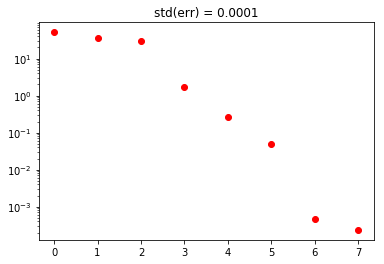

||a_est|| =  0.15133102974618554
a_est =  [[-0.00063184]
 [-0.00318613]
 [ 0.01563466]
 [ 0.06140856]
 [-0.06936081]
 [ 0.00600895]
 [ 0.06247456]
 [-0.10062294]]
[[ 1.92182025e-03  2.33232945e-03  1.86675843e-03  9.32593782e-04
   4.12531203e-04  7.03003277e-04  1.25228740e-03  1.30857195e-03]
 [ 9.93056034e-03  1.16792368e-03 -1.02544301e-02 -1.13424821e-02
  -1.34760065e-03  7.67256278e-03  6.06938075e-03 -3.45932917e-03]
 [-2.24446439e-02  2.66532128e-02  1.09222745e-02 -4.45592652e-02
  -6.97606868e-02 -3.74919293e-02  1.52882302e-02  2.91364145e-02]
 [ 1.48860027e-01 -1.80597157e-01  1.96855348e-01 -1.39267285e-01
   8.56909762e-02 -1.83384108e-01  7.14966062e-02 -7.52244424e-02]
 [-2.46678639e-01 -1.02927115e-01  8.84685155e-02 -7.62970209e-02
   1.02700352e-01  1.76364255e-01  2.76816952e-01  8.18683261e-02]
 [ 1.21878274e-02 -2.38653464e-02 -3.78415428e-03  1.23378437e-02
  -1.52804315e-02  5.46271641e-03  2.71529622e-03  2.05261609e-02]
 [ 1.72153654e-03 -3.76074989e-02  2.13

In [3]:
# stima del livello di rumore dalla risposta all'impulso discreto [par.11.3.1]:
a = np.poly([0.2, 0.4+0.87j, 0.4-0.87j, -0.1+0.1j, -0.1-0.1j, -0.89, 0.88])
na = len(a) - 1
print("na = ", na)
b = np.array([0.0, 2.4, 4.4, 8.4, 7.4])
nb = len(b) - 1
N = 64
stde = 1.0*1.e-4
u = np.zeros(N);  u[0]=1.0
noise = stde*np.random.rand(N)
y = simula_DLTI(b,a,u) + noise;
na_est = na+1  # costruisco una matrice di Hankel che ha "na_est" colonne pari al valore vero di "na" piu' uno:
               # nel caso deterministico la matrice risulterebbe singolare.
jfig = 1
A = hankel(y[1:N-na_est], y[N-na_est-1:N-1])
print("A.shape = ",A.shape)
U,S,V = np.linalg.svd(A.copy()); V = V.T
print("Sigma = ",S)
plt.figure(jfig*20+na_est); plt.semilogy(S,'ro'); plt.title('std(err) = ' + str(stde)); plt.show() 
d = - np.atleast_2d( noise[na_est+1:N] ).T
Q,R = np.linalg.qr(A.copy())
a_est = np.linalg.solve( R , Q.T@d )
print("||a_est|| = ",np.linalg.norm(a_est))
print("a_est = ",a_est)
print(V.T * (a_est / np.linalg.norm(a_est))) 
print("stima std rumore = ",S[-1] * (abs(a_est[-1])/np.linalg.norm(a_est)))

In [7]:
np.linalg.norm(a_est)

0.3095578562709754

na =  7
std = 0.0 :
### na_est =  1 :


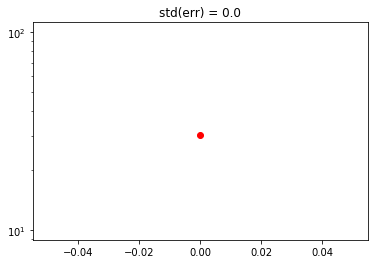

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.74094934]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.  2.4]


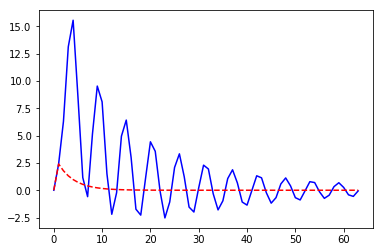

### na_est =  2 :


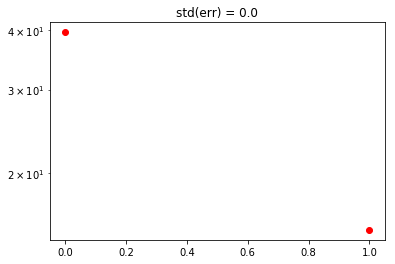

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21625056  0.65362331]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.         2.4        3.37699865]


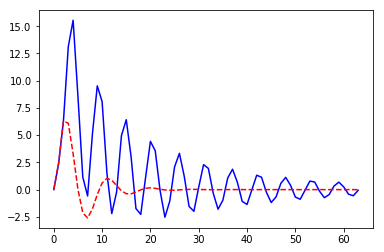

### na_est =  3 :


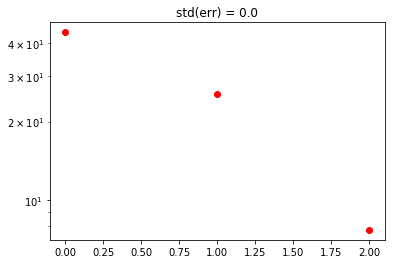

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.68740899  1.61319279 -0.80094766]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.         2.4        2.24621842 6.36789569]


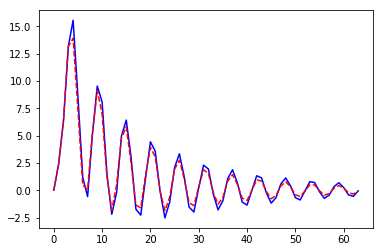

### na_est =  4 :


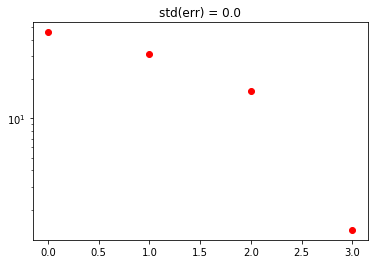

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79406241  0.12323547  0.6340996  -0.71855887]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.         2.4        4.39025022 8.4165082  7.42487331]


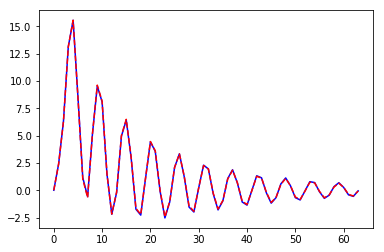

### na_est =  5 :


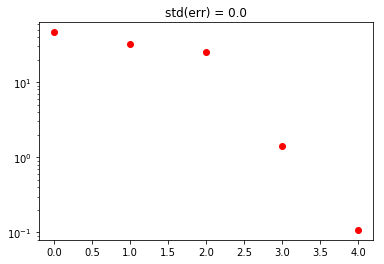

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.37353837  0.57138116  0.58688411 -1.11125735  0.43032752]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.          2.4         2.9995079   5.84367718  2.53026402 -4.28841806]


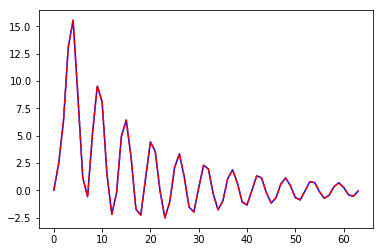

### na_est =  6 :


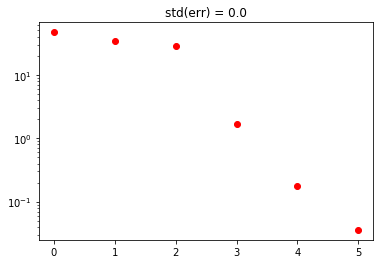

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.98269039  0.28884512  0.60274659 -0.83901822  0.14508689
 -0.00773825]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.          2.4         3.93754306  7.62636959  5.91747515 -1.16621562
  0.22876174]


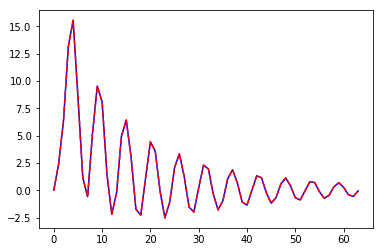

### na_est =  7 :


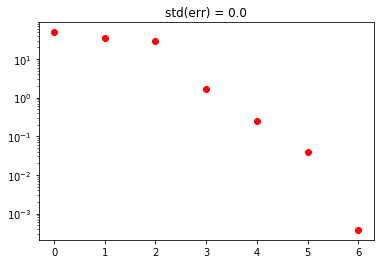

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  4.40000000e+00  8.40000000e+00
  7.40000000e+00  9.39692768e-13 -3.19300142e-13 -1.75859327e-13]


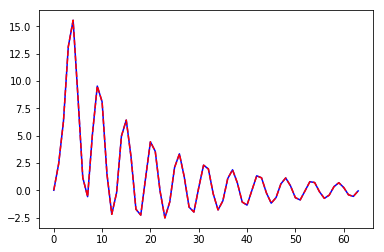

### na_est =  8 :


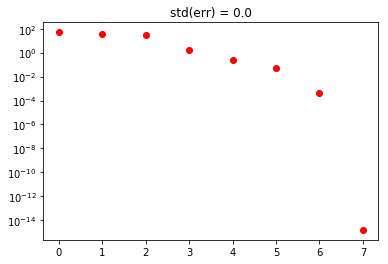

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -9.27272361e-01  2.14145165e-01  6.33019311e-01
 -8.06357915e-01  8.52714318e-02  1.36337866e-02  1.24998661e-03
 -3.94309959e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  4.07054633e+00  7.79600161e+00
  6.24691217e+00 -1.01581547e+00 -9.27169452e-12  1.76858528e-12
 -1.47437618e-13]


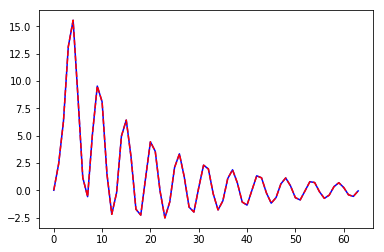

### na_est =  9 :


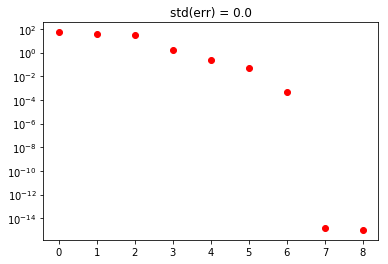

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -8.80876824e-01  3.78142893e-01  4.79409660e-01
 -7.55106733e-01  1.81910847e-01 -1.30939957e-01 -8.53715688e-04
  2.11052568e-03  5.76360545e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  4.18189562e+00  8.48170246e+00
  7.51949556e+00  1.01297319e+00  1.48481149e+00 -2.24744667e-11
  4.70912198e-12 -9.64561764e-13]


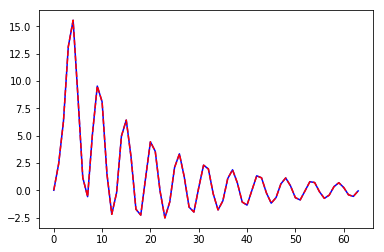

### na_est =  10 :


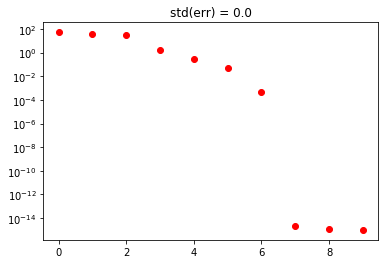

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -9.27376554e-01  1.83891746e-01  4.95666775e-01
 -6.82199536e-01  4.86527975e-02 -6.90506559e-02  1.17382482e-01
  1.37889306e-03 -1.99368824e-03 -4.63347890e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  4.07029627e+00  7.72273740e+00
  5.72542352e+00 -1.98115636e+00 -1.57946114e+00 -1.19366996e+00
 -3.43192141e-12  8.35775893e-13 -2.35367281e-13]


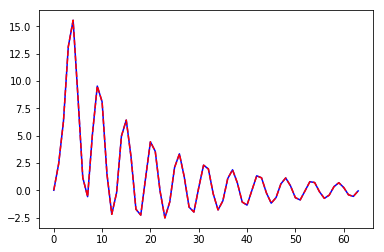

### na_est =  11 :


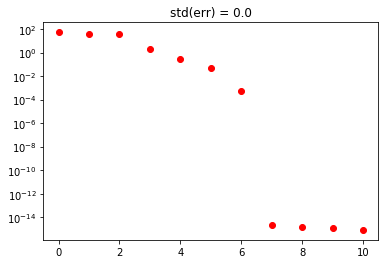

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -7.01044529e-01  3.77964780e-01 -1.88918803e-01
 -2.60202112e-01  1.55836979e-01 -6.17222369e-01  3.53202980e-01
  7.71846219e-02 -4.61255958e-03 -2.72772798e-03 -2.61344163e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  4.61349313e+00  9.61349912e+00
  8.27381434e+00  7.86170913e-01 -2.69758074e+00 -5.02105994e+00
 -6.73270958e-01 -1.66271441e-11  3.39639428e-12 -7.37188088e-13]


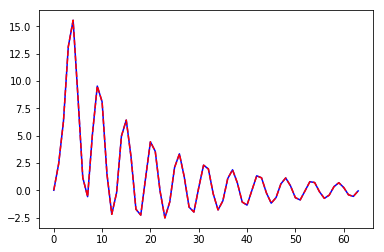

### na_est =  12 :


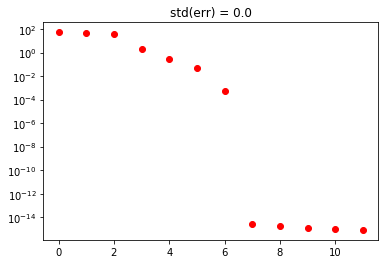

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -8.34833532e-01  4.04593599e-01  1.17070244e-01
 -1.44349307e-01 -2.29409298e-01 -2.45457392e-01  4.22403015e-01
 -3.08973109e-01  8.59265272e-02  4.62730655e-03 -6.06309825e-04
 -3.73127628e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  4.29239952e+00  8.83507272e+00
  7.42050998e+00  1.26029955e+00  3.93376292e-01 -2.04886784e-01
  1.30215368e+00 -9.61245864e-01 -2.10498285e-12  4.59410288e-13
 -1.89182003e-13]


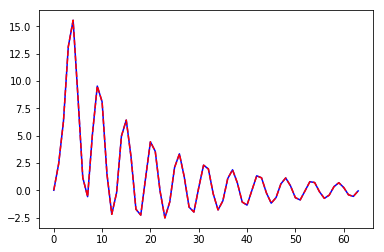

### na_est =  13 :


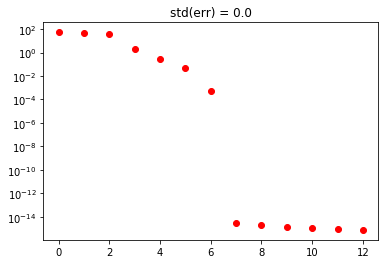

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -3.19459159e-01 -1.56329711e-01  4.10443546e-01
 -4.27762999e-01 -2.39492149e-01  1.11401109e-01 -1.88794521e-01
  1.11330596e-01  2.33824971e-01 -1.93141339e-01 -5.05675182e-03
  2.91208557e-03  7.66688619e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.00000000e+00  2.40000000e+00  5.52929802e+00  1.07336538e+01
  1.13548270e+01  3.07946653e+00 -1.88500360e+00 -2.76377023e+00
 -9.01927231e-01  1.61698549e+00  1.97513186e+00  4.96513941e-12
 -1.10800258e-12  1.40776280e-13]


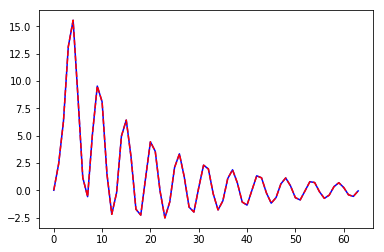

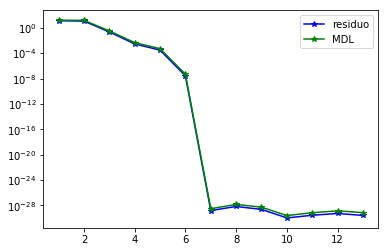

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.  2.4 4.4 8.4 7.4]


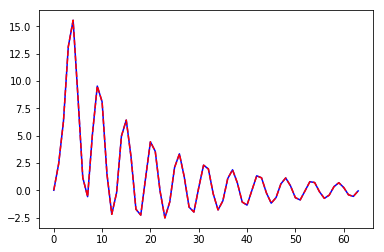

std = 1e-16 :
### na_est =  1 :


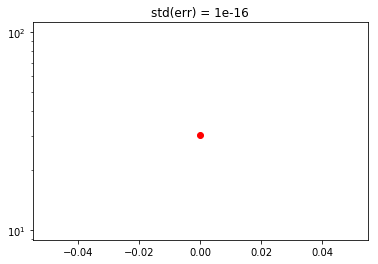

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.74094934]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.69733214e-17 2.40000000e+00]


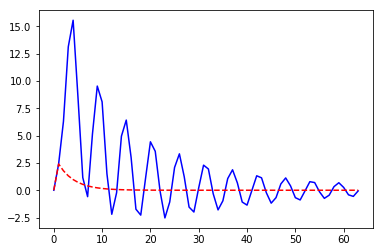

### na_est =  2 :


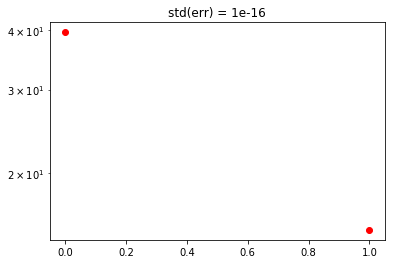

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21625056  0.65362331]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.69733214e-17 2.40000000e+00 3.37699865e+00]


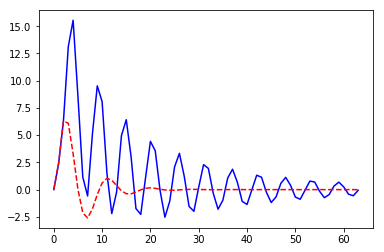

### na_est =  3 :


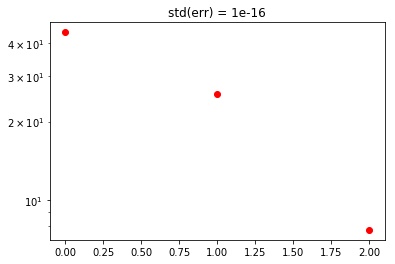

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.68740899  1.61319279 -0.80094766]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.69733214e-17 2.40000000e+00 2.24621842e+00 6.36789569e+00]


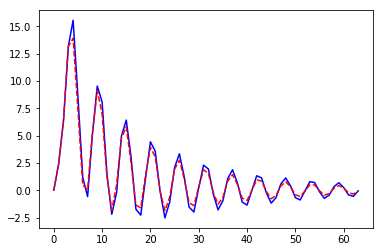

### na_est =  4 :


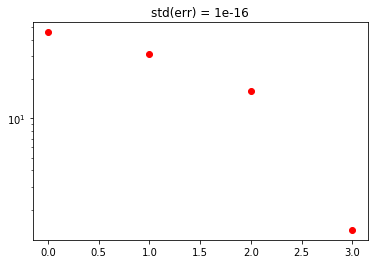

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79406241  0.12323547  0.6340996  -0.71855887]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.69733214e-17 2.40000000e+00 4.39025022e+00 8.41650820e+00
 7.42487331e+00]


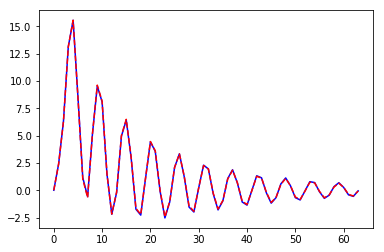

### na_est =  5 :


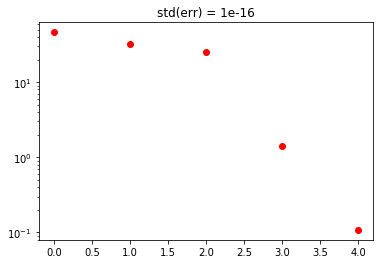

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.37353837  0.57138116  0.58688411 -1.11125735  0.43032752]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  2.99950790e+00  5.84367718e+00
  2.53026402e+00 -4.28841806e+00]


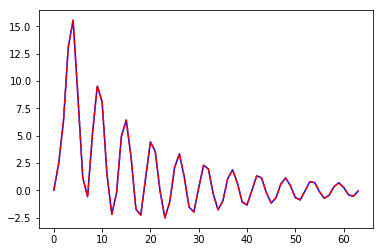

### na_est =  6 :


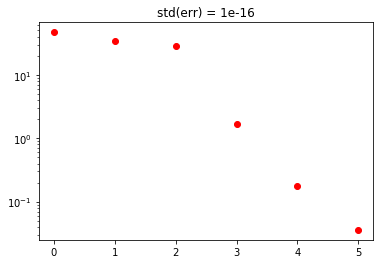

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.98269039  0.28884512  0.60274659 -0.83901822  0.14508689
 -0.00773825]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  3.93754306e+00  7.62636959e+00
  5.91747515e+00 -1.16621562e+00  2.28761736e-01]


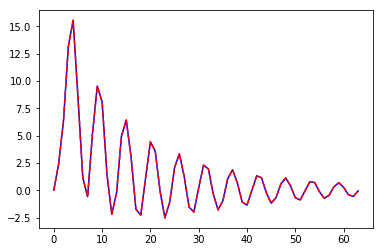

### na_est =  7 :


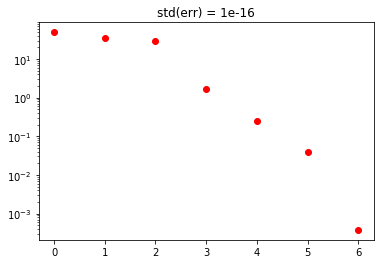

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  4.40000000e+00  8.40000000e+00
  7.40000000e+00  1.15694121e-11 -2.52864396e-12  1.93622895e-13]


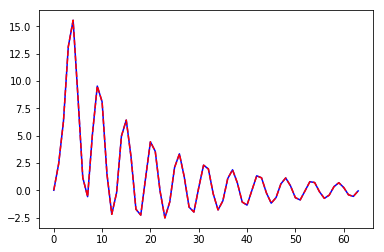

### na_est =  8 :


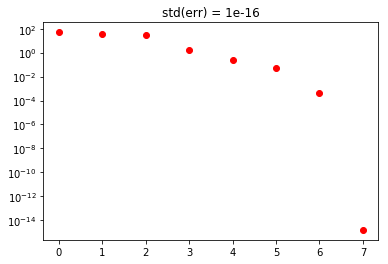

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -5.23113467e-01 -1.05140361e-01  6.75738907e-01
 -5.44653310e-01 -2.04700482e-01  8.29186487e-03  6.02690451e-03
  7.66622044e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  5.04052768e+00  9.57430075e+00
  9.64184688e+00  1.97496035e+00 -1.81903381e-11  3.45445894e-12
 -5.85309579e-13]


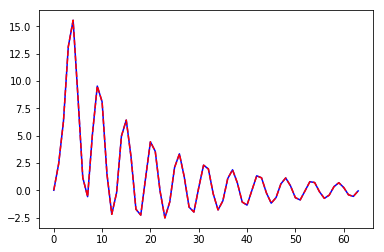

### na_est =  9 :


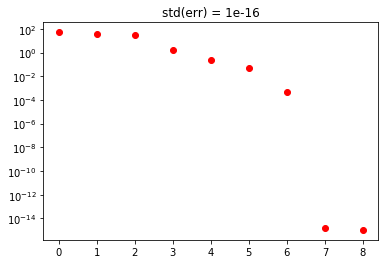

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -4.23207934e-01  8.13478709e-02  4.76622175e-01
 -4.51907362e-01 -1.04516708e-01 -1.83454944e-01  3.69965607e-03
  4.19062815e-03  7.62391105e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  5.28030096e+00  1.06508777e+01
  1.16488732e+01  4.94373556e+00  1.96406066e+00  1.87658777e-11
 -3.45590223e-12  7.53175300e-13]


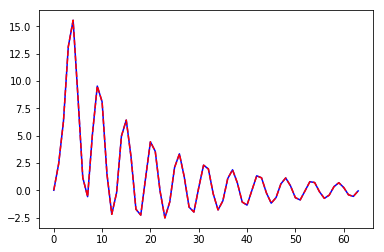

### na_est =  10 :


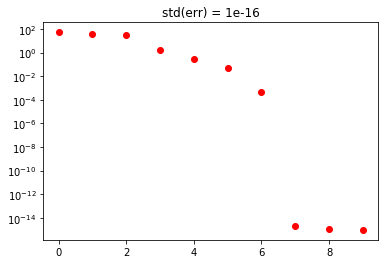

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.54001886  0.06295712  0.14741846 -0.2198569  -0.13510445
 -0.36429529  0.29384578  0.00789064 -0.00433394 -0.0011613 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  4.99995474e+00  9.87129834e+00
  9.21041806e+00  1.37083139e+00 -2.25092007e+00 -2.99172527e+00
 -1.44462220e-11  2.96473956e-12 -5.18696197e-13]


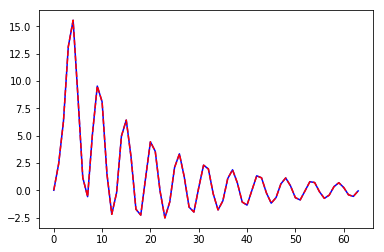

### na_est =  11 :


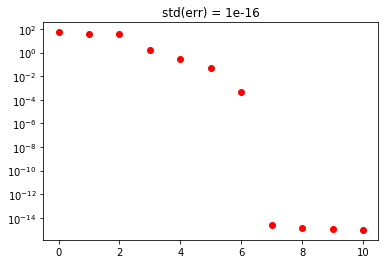

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -1.01143330e+00  2.01134298e-01 -3.86458873e-01
 -2.58153876e-02 -1.56989507e-02 -6.23743921e-01  7.68493171e-01
  1.58637229e-02 -1.28552273e-02 -3.13683584e-03 -1.30199259e-05]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  3.86856009e+00  7.23489828e+00
  2.61404316e+00 -7.04016556e+00 -9.62466969e+00 -7.98112931e+00
 -3.35417401e-02  3.20010685e-12 -5.16919840e-13  9.32587341e-15]


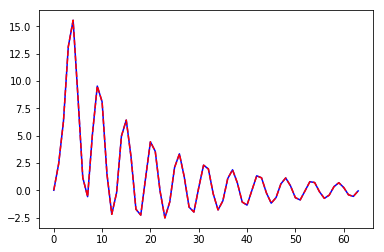

### na_est =  12 :


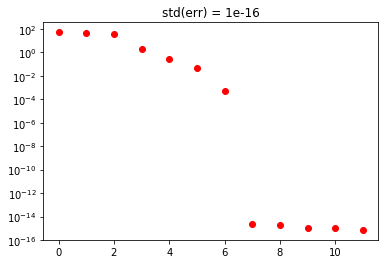

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.21311623  0.33153706  0.27352972 -0.55655753 -0.41290953
  0.03346362 -0.26821224 -0.2335292   0.43519234  0.00580779 -0.00765559
 -0.00171886]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  5.78452105e+00  1.25740692e+01
  1.54930792e+01  9.96238043e+00  3.58371803e+00 -3.57194893e+00
 -6.52825051e+00 -4.42811032e+00 -1.94191330e-11  3.74567044e-12
 -8.44657677e-13]


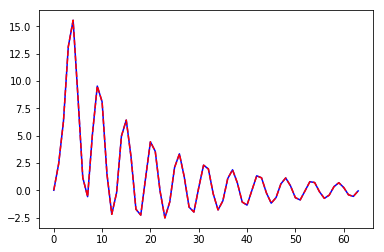

### na_est =  13 :


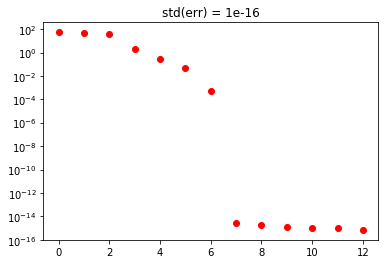

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -2.78435650e-02 -9.49151564e-01  8.15619228e-01
 -4.73205359e-01 -3.78214089e-01  1.23293177e-01 -1.60310907e-01
  4.28210233e-01 -2.51959983e-02 -1.18783891e-01 -1.15391341e-03
  2.33009536e-03  4.43522381e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.69733214e-17  2.40000000e+00  6.22917544e+00  1.06668932e+01
  1.11616855e+01 -3.47286417e-01 -7.02263782e+00 -4.33912834e+00
 -9.13070064e-01  2.59828837e+00  1.14259578e+00  3.79318799e-12
 -1.16529009e-12  2.10137463e-13]


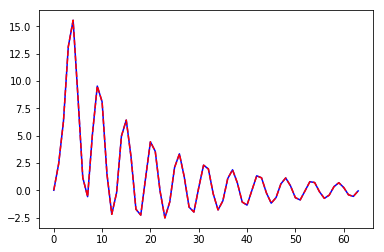

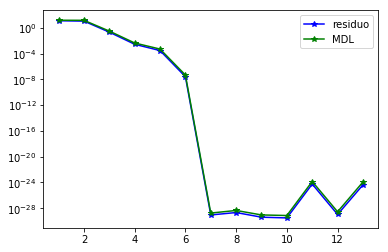

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.69733214e-17 2.40000000e+00 4.40000000e+00 8.40000000e+00
 7.40000000e+00]


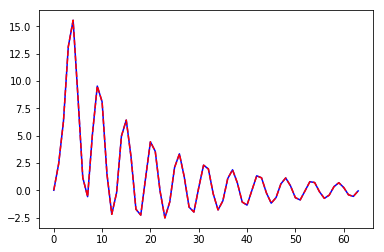

std = 1e-12 :
### na_est =  1 :


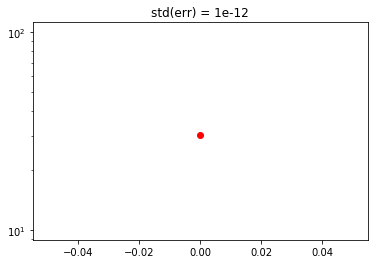

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.74094934]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.70825079e-13 2.40000000e+00]


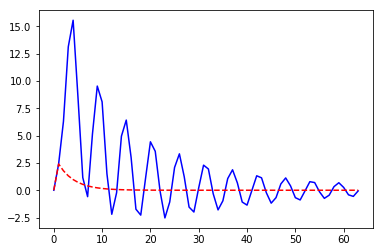

### na_est =  2 :


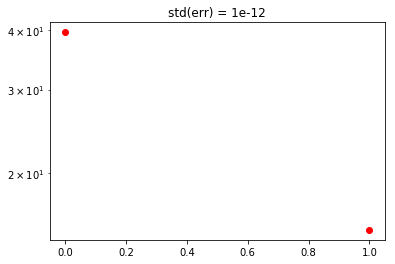

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21625056  0.65362331]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.70825079e-13 2.40000000e+00 3.37699865e+00]


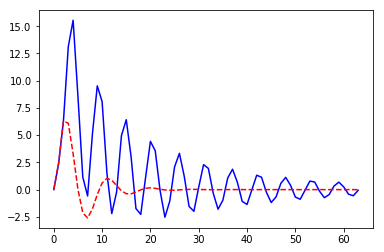

### na_est =  3 :


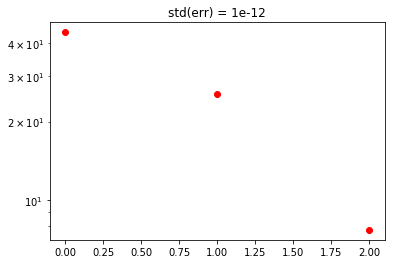

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.68740899  1.61319279 -0.80094766]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.70825079e-13 2.40000000e+00 2.24621842e+00 6.36789569e+00]


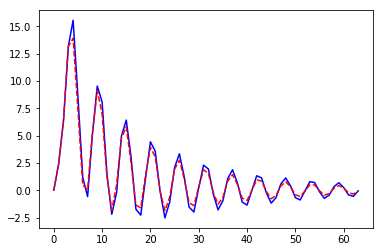

### na_est =  4 :


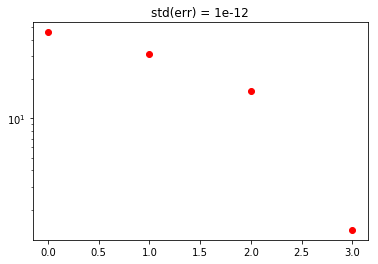

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79406241  0.12323547  0.6340996  -0.71855887]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.70825079e-13 2.40000000e+00 4.39025022e+00 8.41650820e+00
 7.42487331e+00]


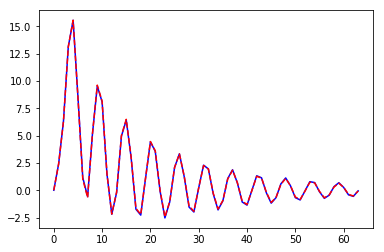

### na_est =  5 :


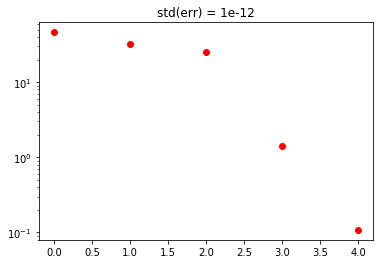

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.37353837  0.57138116  0.58688411 -1.11125735  0.43032752]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  2.99950790e+00  5.84367718e+00
  2.53026402e+00 -4.28841806e+00]


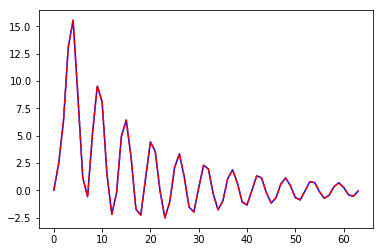

### na_est =  6 :


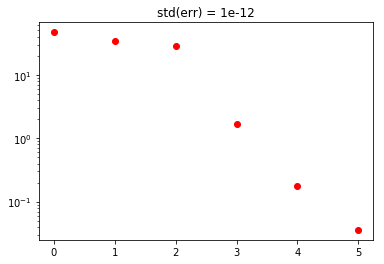

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.98269039  0.28884512  0.60274659 -0.83901822  0.14508689
 -0.00773825]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  3.93754306e+00  7.62636959e+00
  5.91747515e+00 -1.16621562e+00  2.28761736e-01]


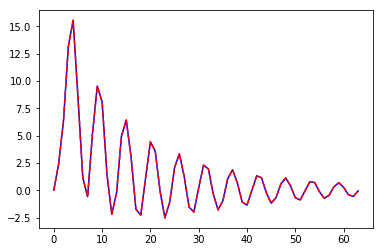

### na_est =  7 :


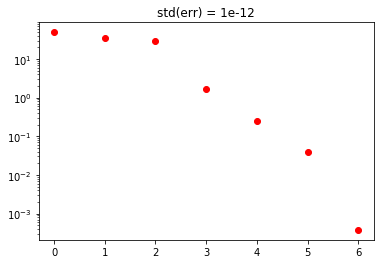

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  4.40000000e+00  8.40000000e+00
  7.40000000e+00  4.87466068e-10 -1.25499833e-10  4.57678340e-11]


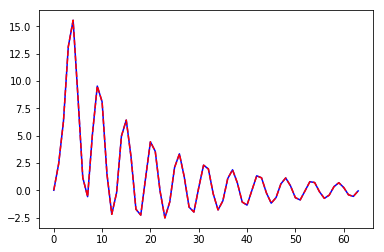

### na_est =  8 :


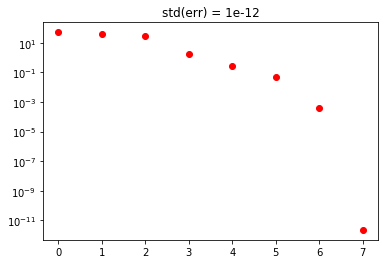

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.39312231 -0.20783337  0.68947897 -0.46048027 -0.29796525
  0.00657372  0.00756332  0.00114002]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  5.35250645e+00  1.01462618e+01
  1.07337726e+01  2.93689487e+00 -3.13460147e-09  6.27138896e-10
 -1.10428999e-10]


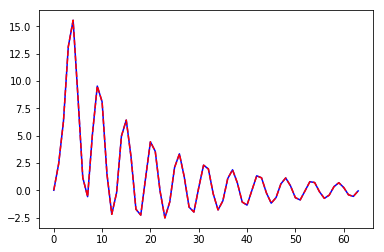

### na_est =  9 :


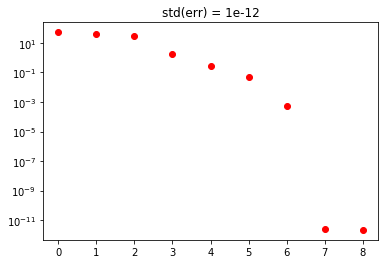

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.19084864  0.13006218  0.31768282 -0.27689618 -0.12082071
 -0.35317874  0.0033759   0.00760346  0.0014296 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  5.83796326e+00  1.22307262e+01
  1.46227151e+01  8.61433071e+00  3.68291893e+00  1.17269705e-09
 -2.27950103e-10  3.55893093e-11]


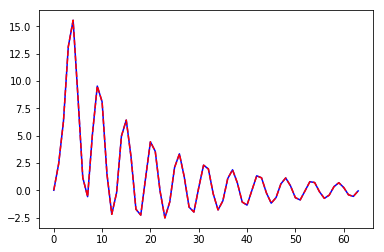

### na_est =  10 :


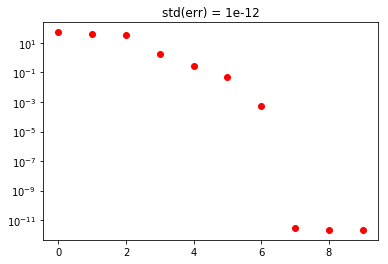

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -2.95527225e-01  7.68205549e-02  1.84950600e-01
 -1.78091021e-01 -1.57952046e-01 -4.02585939e-01  1.68278000e-01
  8.72362608e-03 -1.66820942e-03 -6.57962297e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  5.58673466e+00  1.14438899e+01
  1.25955488e+01  5.68997524e+00  7.52888758e-01 -1.69503271e+00
  2.53731258e-10 -5.62181413e-11  1.54525281e-11]


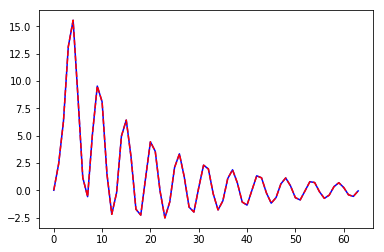

### na_est =  11 :


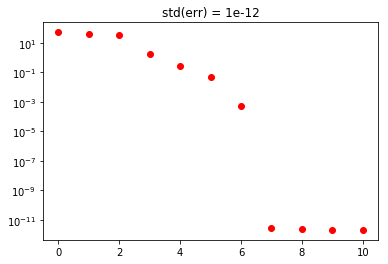

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -2.29385456e-01 -4.66383732e-02  1.08470145e-01
 -2.85843508e-01 -6.60686819e-02 -4.69635723e-01  1.06141404e-01
  1.91752594e-01 -1.74438043e-04 -4.05479781e-03 -7.27990095e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  5.74547491e+00  1.15640171e+01
  1.25024889e+01  4.35824569e+00 -2.06285835e+00 -4.85787330e+00
 -1.87543726e+00  5.49960388e-09 -1.07710552e-09  2.19375185e-10]


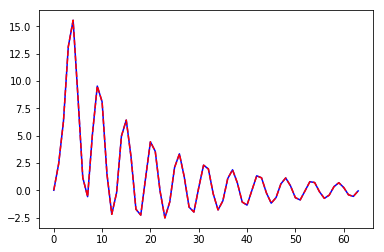

### na_est =  12 :


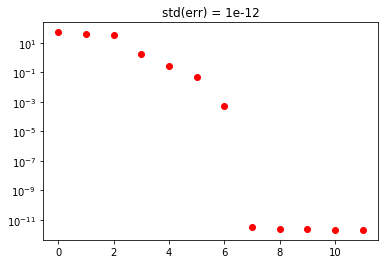

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.08518982  0.03302677 -0.12626049 -0.381641   -0.32058507
 -0.31459356 -0.06250933  0.08235122  0.35624639 -0.00121015 -0.00736934
 -0.00141418]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  6.09154443e+00  1.26630691e+01
  1.43325769e+01  5.93726147e+00 -3.88681330e+00 -1.01471002e+01
 -8.12953865e+00 -3.64319735e+00  2.65332467e-09 -5.10243181e-10
  1.43136170e-10]


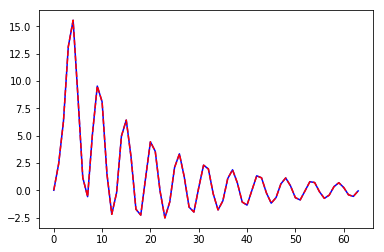

### na_est =  13 :


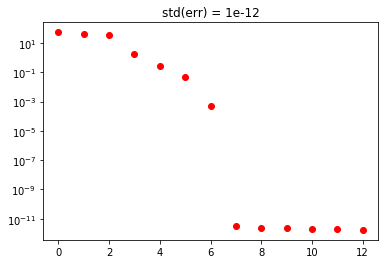

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -2.04324329e-01  2.68739590e-02 -1.62818052e-01
 -2.69481649e-01 -2.48394892e-01 -1.60454630e-01 -9.94013791e-02
  1.25603837e-01  4.08399657e-01 -1.87436040e-01 -8.59754311e-03
  2.08616018e-03  7.41730839e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.70825079e-13  2.40000000e+00  5.80562161e+00  1.18982315e+01
  1.26430368e+01  4.04356169e+00 -4.59999504e+00 -8.60966797e+00
 -4.80623548e+00 -3.19176001e-01  1.91083601e+00  1.96686245e-09
 -3.49464457e-10  9.80998616e-11]


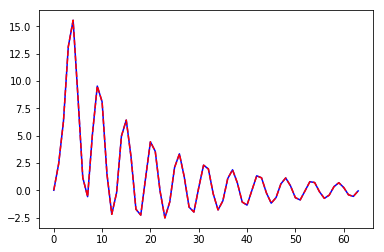

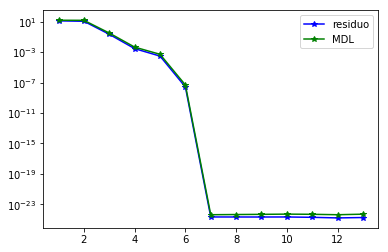

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.70825079e-13 2.40000000e+00 4.40000000e+00 8.40000000e+00
 7.40000000e+00]


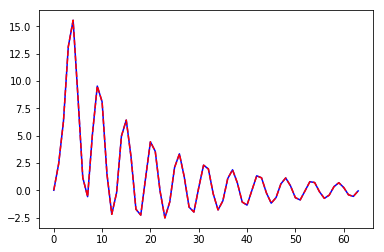

std = 1e-06 :
### na_est =  1 :


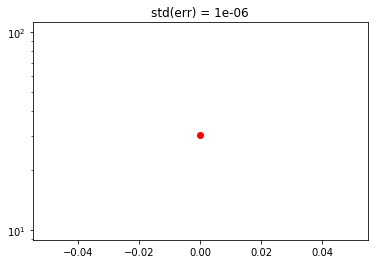

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.74094936]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.59680814e-07 2.39999981e+00]


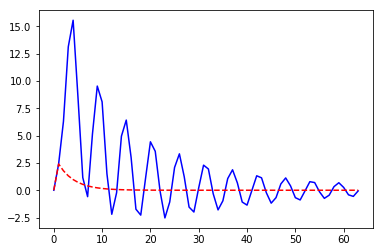

### na_est =  2 :


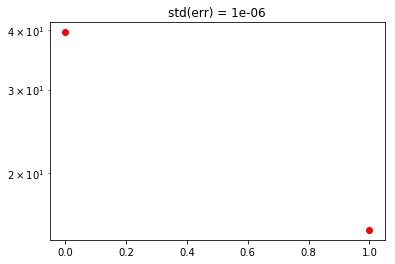

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21625059  0.65362329]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.59680814e-07 2.39999954e+00 3.37699914e+00]


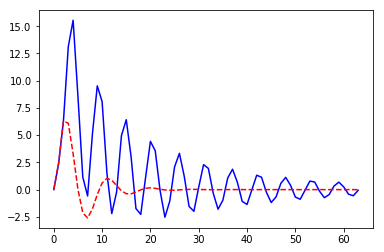

### na_est =  3 :


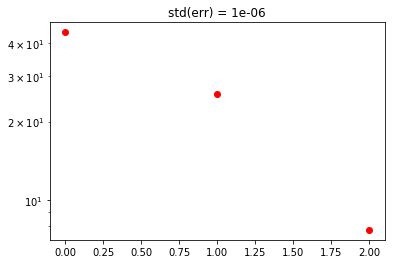

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.68740902  1.61319283 -0.80094769]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.59680814e-07 2.39999928e+00 2.24621933e+00 6.36789532e+00]


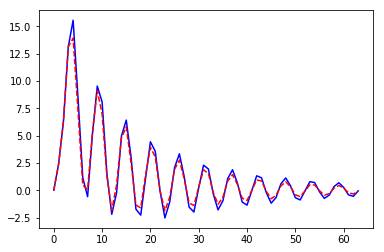

### na_est =  4 :


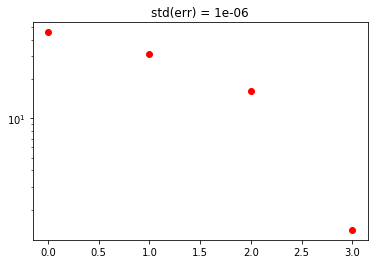

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79406243  0.12323547  0.63409961 -0.71855889]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.59680814e-07 2.39999978e+00 4.39025052e+00 8.41650868e+00
 7.42487264e+00]


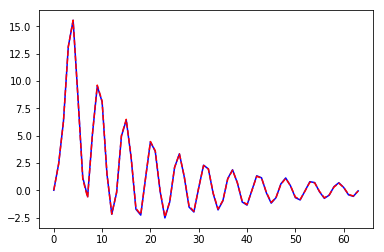

### na_est =  5 :


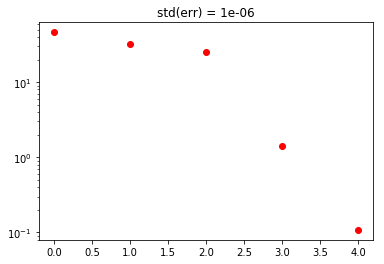

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.37353694  0.57138003  0.58688426 -1.11125641  0.43032646]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.39999946e+00  2.99951183e+00  5.84368396e+00
  2.53027539e+00 -4.28840683e+00]


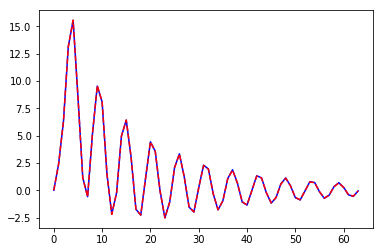

### na_est =  6 :


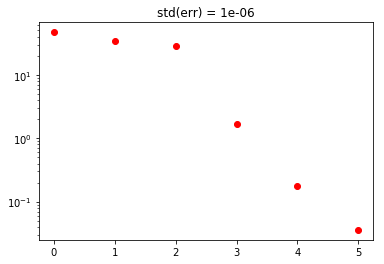

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.98268415  0.28883716  0.60274964 -0.83901444  0.14508029
 -0.00773599]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.39999967e+00  3.93755844e+00  7.62639032e+00
  5.91751370e+00 -1.16619449e+00  2.28739430e-01]


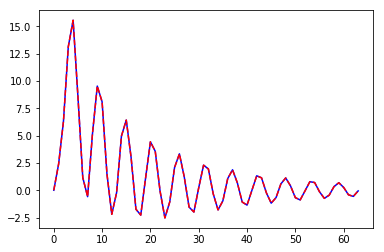

### na_est =  7 :


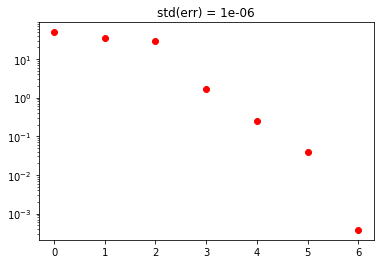

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79007366  0.10577077  0.64750913 -0.7175147  -0.01315675
  0.01181011  0.00287285]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.39999978e+00  4.39982356e+00  8.39970671e+00
  7.39943107e+00 -4.48488366e-04  7.53232440e-05 -1.58286662e-05]


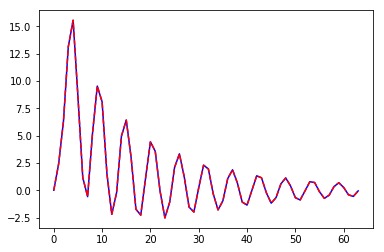

### na_est =  8 :


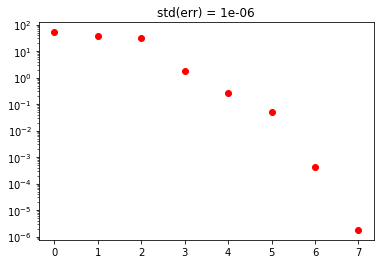

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -4.64352141e-01 -1.51383585e-01  6.81774405e-01
 -5.06551929e-01 -2.46752598e-01  7.36546461e-03  6.74742998e-03
  9.34140483e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.39999997e+00  5.18155514e+00  9.83327907e+00
  1.01361426e+01  2.41115137e+00  1.05072875e-03 -2.12198021e-04
  3.96535336e-05]


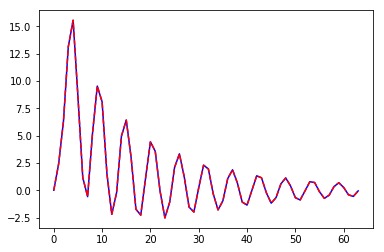

### na_est =  9 :


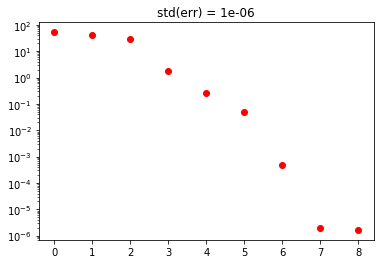

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -3.95858958e-01  3.82097301e-03  5.23925631e-01
 -4.40341769e-01 -1.60278671e-01 -1.43554263e-01  4.56371517e-03
  3.64468436e-03  5.98904736e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.40000000e+00  5.34593888e+00  1.06370031e+01
  1.16331151e+01  4.67730046e+00  1.55203028e+00  1.37981594e-03
 -2.76841912e-04  6.41242885e-05]


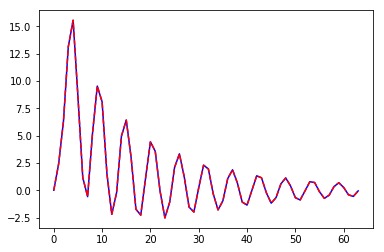

### na_est =  10 :


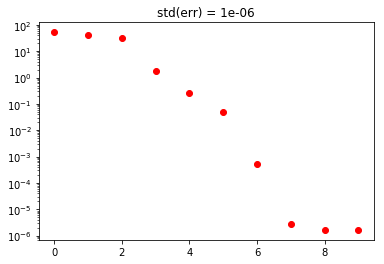

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.46323394 -0.09586659  0.24363622 -0.18837035 -0.25311424
 -0.28790727  0.28876639  0.00641025 -0.00442033 -0.00113607]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.39999997e+00  5.18423886e+00  9.97355983e+00
  9.44881705e+00  1.16204379e+00 -2.88680865e+00 -2.90998698e+00
  2.83559491e-03 -5.44177265e-04  1.23935462e-04]


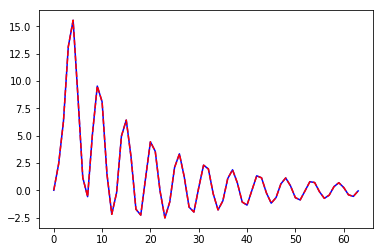

### na_est =  11 :


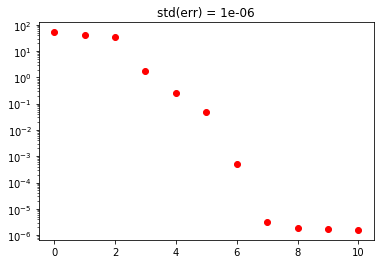

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.32010454 -0.20415768  0.15858179 -0.37361447 -0.08240702
 -0.39349473  0.13006173  0.26278042 -0.00116601 -0.00555075 -0.00102175]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.40000005e+00  5.52774939e+00  1.06148039e+01
  1.04407662e+01  9.86158170e-01 -5.22056116e+00 -6.60051409e+00
 -2.61834438e+00  1.62365022e-03 -2.97210968e-04  8.77196194e-05]


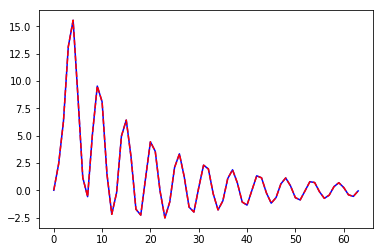

### na_est =  12 :


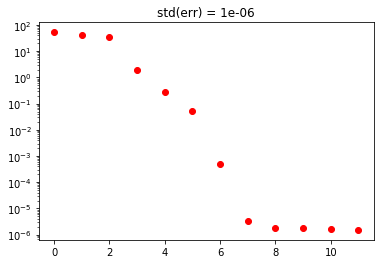

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -2.56359357e-01 -1.54950770e-01  1.07071313e-01
 -4.00214338e-01 -1.67843032e-01 -3.35782228e-01  5.76084216e-02
  2.07986280e-01  1.12066553e-01 -4.58380784e-03 -2.96696425e-03
 -4.51149162e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.40000008e+00  5.68073787e+00  1.11342402e+01
  1.14632948e+01  2.23455345e+00 -4.95963825e+00 -7.65578014e+00
 -4.38371977e+00 -1.14555576e+00  2.60232367e-03 -4.79833390e-04
  1.18350955e-04]


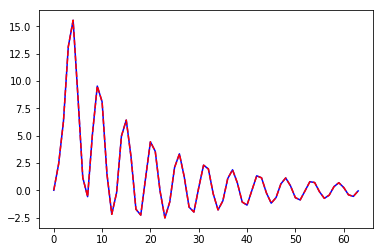

### na_est =  13 :


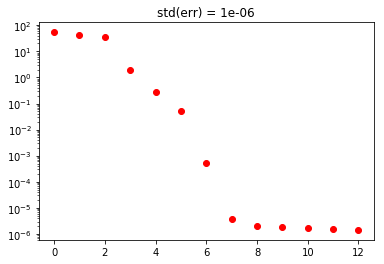

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -2.71036987e-01 -2.14249863e-01  5.71995484e-02
 -3.35070756e-01 -9.80981098e-02 -1.86582518e-01 -5.76879413e-02
  3.10664665e-01  1.94156860e-01 -1.90856814e-01 -5.24089260e-03
  2.96551053e-03  7.36813707e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 5.59680814e-07  2.40000007e+00  5.64551152e+00  1.08995119e+01
  1.07776826e+01  1.07072264e+00 -6.08359236e+00 -7.30249731e+00
 -2.27911512e+00  1.87484672e+00  1.90888406e+00  1.22062679e-03
 -2.22684382e-04  6.64066905e-05]


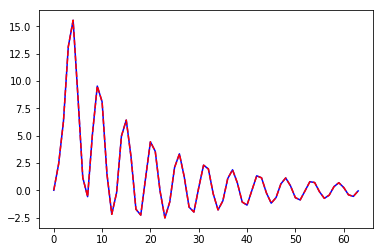

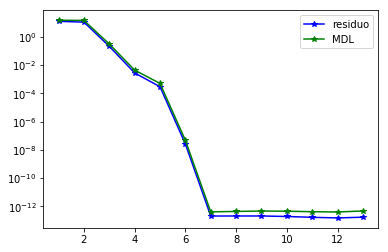

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79007366  0.10577077  0.64750913 -0.7175147  -0.01315675
  0.01181011  0.00287285]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [5.59680814e-07 2.39999978e+00 4.39982356e+00 8.39970671e+00
 7.39943107e+00]


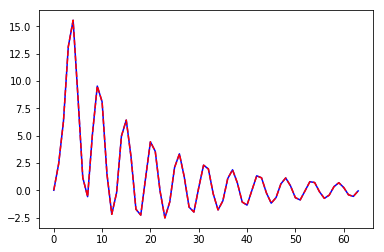

std = 0.0001 :
### na_est =  1 :


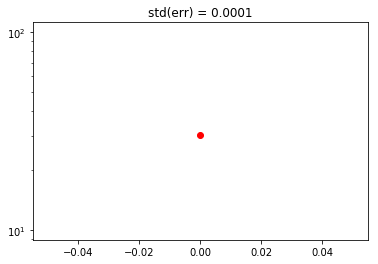

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.74095245]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.40164372e-05 2.40001145e+00]


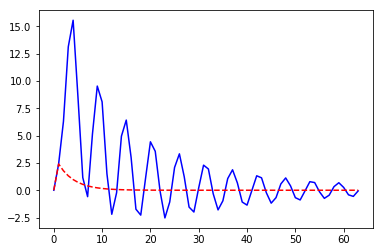

### na_est =  2 :


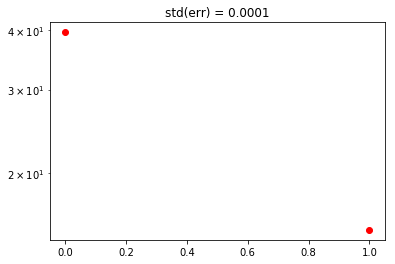

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21625404  0.65362092]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.40164372e-05 2.40000479e+00 3.37699241e+00]


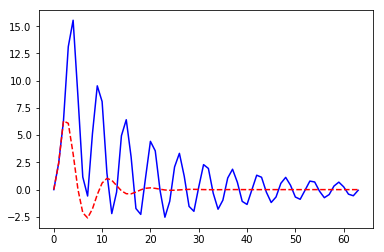

### na_est =  3 :


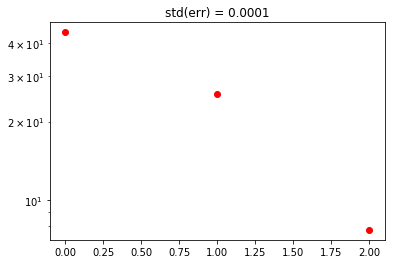

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.68741166  1.61319576 -0.80095007]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.40164372e-05 2.39999818e+00 2.24621727e+00 6.36795943e+00]


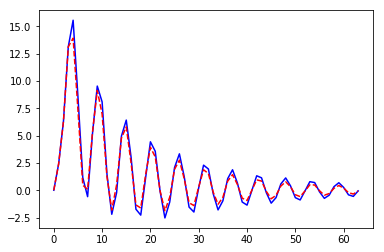

### na_est =  4 :


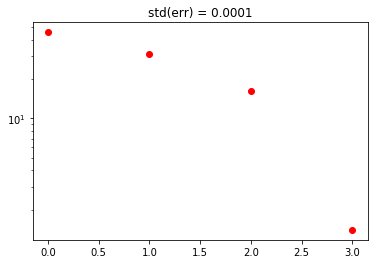

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.79406325  0.12323399  0.63409978 -0.71855976]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.40164372e-05 2.40001071e+00 4.39025208e+00 8.41657777e+00
 7.42486530e+00]


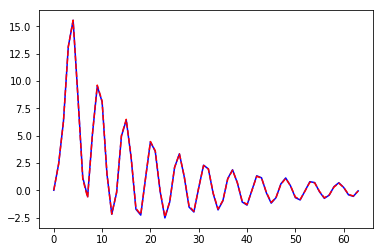

### na_est =  5 :


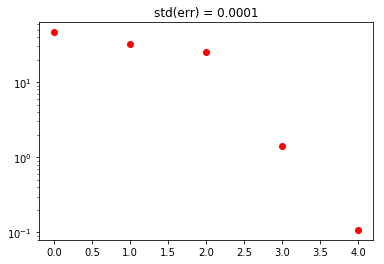

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.3736712   0.57148742  0.58686364 -1.11133644  0.43041967]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40000258e+00  2.99918664e+00  5.84317224e+00
  2.52910773e+00 -4.28940436e+00]


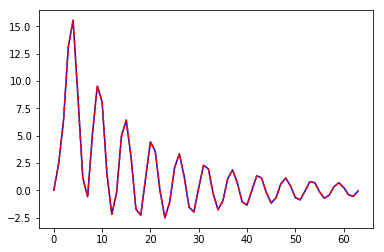

### na_est =  6 :


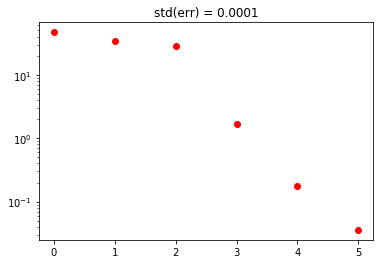

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.98381946  0.29056792  0.60196093 -0.8396554   0.14644764
 -0.00834794]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40000805e+00  3.93483538e+00  7.62347363e+00
  5.91161993e+00 -1.16762999e+00  2.34874128e-01]


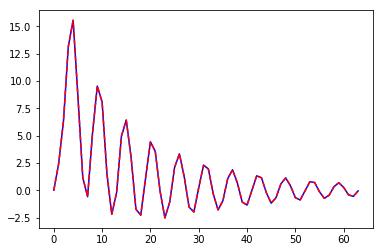

### na_est =  7 :


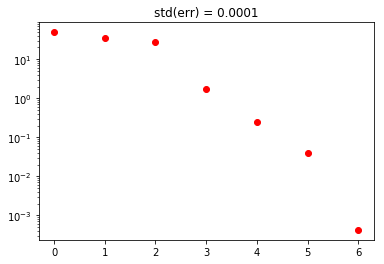

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.75737653  0.07417761  0.65657514 -0.69778979 -0.04022218
  0.01617647  0.00259494]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001122e+00  4.47830032e+00  8.52982201e+00
  7.65128569e+00  1.97761895e-01 -3.36410827e-02  7.87763949e-03]


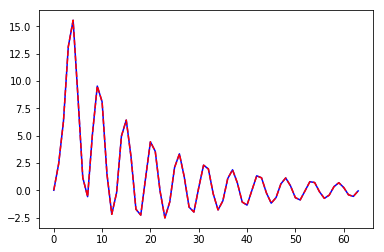

### na_est =  8 :


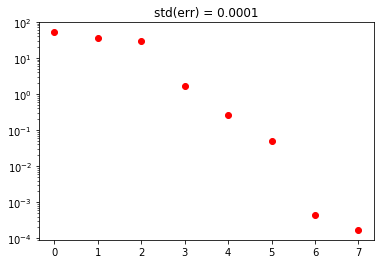

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -5.21722275e-01 -9.20482748e-02  6.62227884e-01
 -5.39903564e-01 -1.97084983e-01 -3.46728290e-03  7.89345763e-03
  6.69507470e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001452e+00  5.04387335e+00  9.61456014e+00
  9.71013417e+00  2.09470528e+00  8.63457463e-02 -1.45114260e-02
  3.11516344e-03]


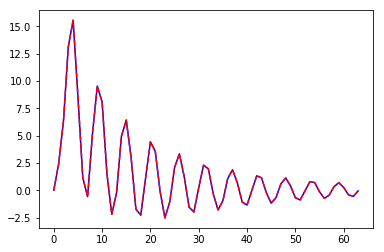

### na_est =  9 :


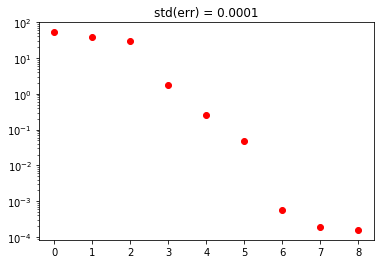

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -4.87252036e-01  4.08011076e-04  5.55452027e-01
 -4.89106685e-01 -1.49233009e-01 -9.92140238e-02  2.01667526e-02
 -3.87999661e-04  5.77177835e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001501e+00  5.12660398e+00  1.00534810e+01
  1.04882350e+01  3.29326063e+00  8.51704752e-01 -1.07089060e-01
  2.21003936e-02 -4.72971849e-03]


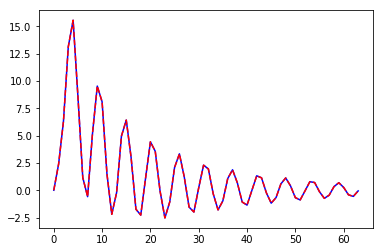

### na_est =  10 :


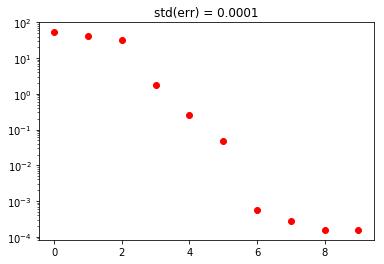

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -5.36723261e-01 -1.03710694e-01  2.38244529e-01
 -2.61171738e-01 -1.92208730e-01 -2.88015572e-01  2.89639760e-01
  5.40544711e-02 -1.31619482e-02 -9.20286137e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001431e+00  5.00787050e+00  9.49211764e+00
  8.42232538e+00 -2.91950364e-01 -4.01921217e+00 -3.71763669e+00
 -3.40368945e-01  6.43673376e-02 -1.22380697e-02]


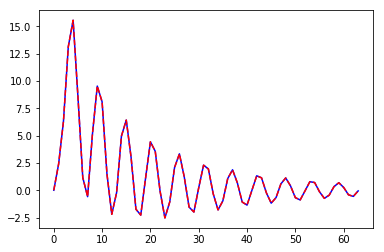

### na_est =  11 :


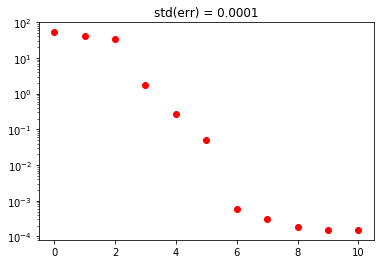

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -4.90259851e-01 -1.37650651e-01  2.13328858e-01
 -3.10512256e-01 -1.61896718e-01 -3.04172228e-01  2.39891348e-01
  1.18089677e-01  7.58481164e-04 -4.33203591e-03 -2.06160935e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001496e+00  5.11938322e+00  9.70319518e+00
  8.75845110e+00 -2.90244089e-01 -4.71486325e+00 -4.83636024e+00
 -1.21008337e+00 -2.77733283e-02  5.35323005e-03 -3.20500324e-03]


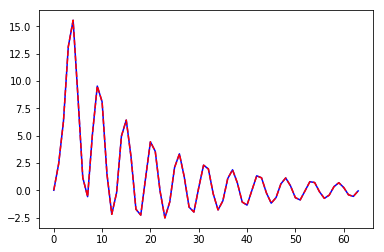

### na_est =  12 :


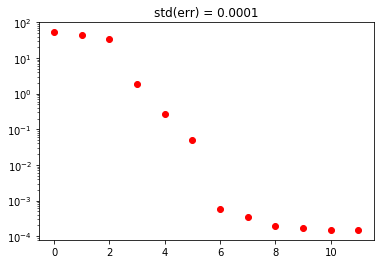

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -4.74916889e-01 -7.09405902e-02  1.50851061e-01
 -3.51062190e-01 -2.61633991e-01 -2.29047044e-01  1.89579855e-01
  3.90009420e-02  1.30845040e-01  4.35642991e-03 -3.54944473e-03
 -5.67383905e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001518e+00  5.15620760e+00  9.95989950e+00
  9.22981368e+00  3.32837640e-01 -4.86120711e+00 -6.19989003e+00
 -3.26218735e+00 -1.47809624e+00 -4.61239432e-02  5.85484513e-03
 -9.95801099e-04]


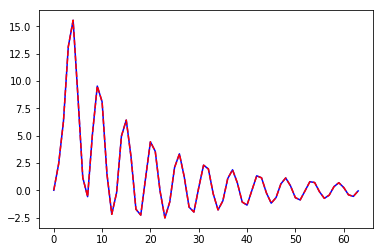

### na_est =  13 :


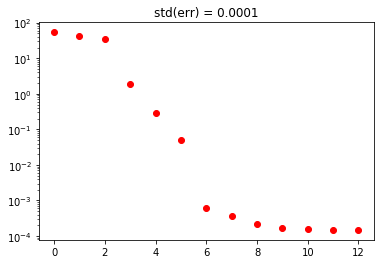

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.52411472 -0.05609154  0.02720508 -0.23569925 -0.15415492
 -0.05261004  0.05542626  0.13278736  0.2584991  -0.24625789 -0.00854418
  0.00383894  0.00116853]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 1.40164372e-05  2.40001449e+00  5.03813194e+00  9.68578531e+00
  8.38106469e+00 -7.38743588e-01 -5.68846481e+00 -5.43836530e+00
 -2.79570861e-01  2.46913033e+00  2.56469452e+00  2.56813376e-02
 -2.74195509e-03 -1.18313380e-03]


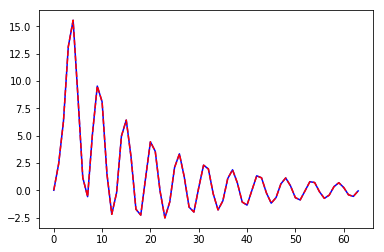

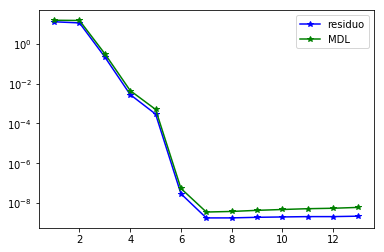

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.75737653  0.07417761  0.65657514 -0.69778979 -0.04022218
  0.01617647  0.00259494]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [1.40164372e-05 2.40001122e+00 4.47830032e+00 8.52982201e+00
 7.65128569e+00]


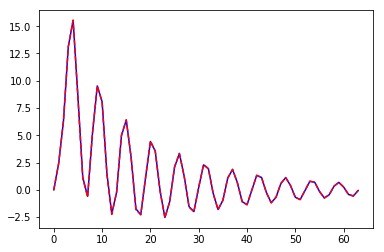

std = 0.01 :
### na_est =  1 :


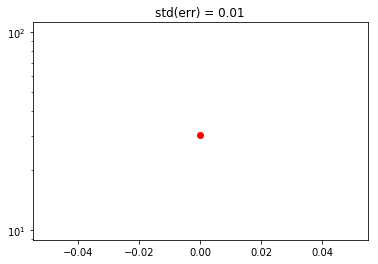

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.74117533]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [2.19437185e-03 2.40046014e+00]


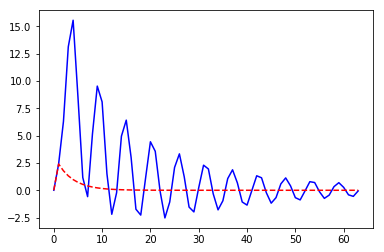

### na_est =  2 :


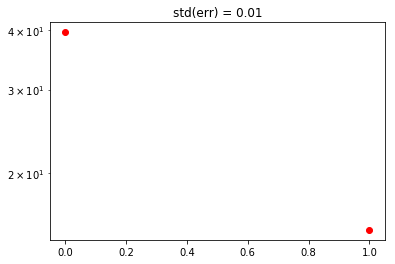

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21639354  0.6533038 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [2.19437185e-03 2.39941733e+00 3.37742758e+00]


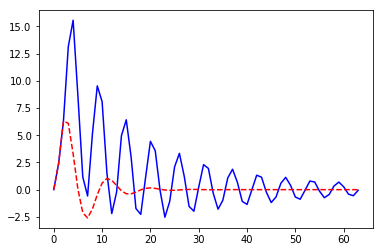

### na_est =  3 :


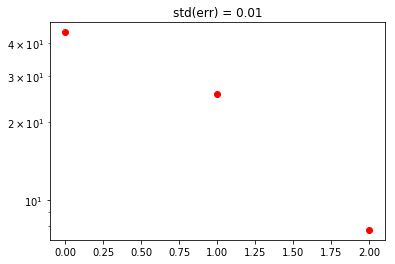

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.68705006  1.61255225 -0.80061597]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [2.19437185e-03 2.39838453e+00 2.24897482e+00 6.37219685e+00]


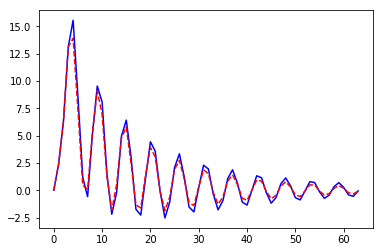

### na_est =  4 :


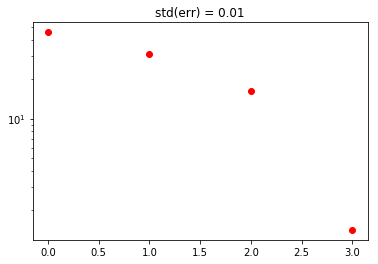

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.7929644   0.12119114  0.63596226 -0.71959709]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [2.19437185e-03 2.40034649e+00 4.39337337e+00 8.42381191e+00
 7.43577575e+00]


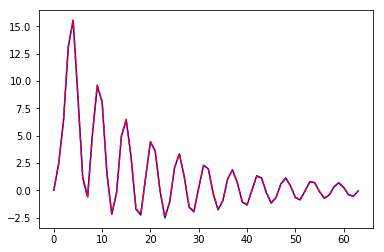

### na_est =  5 :


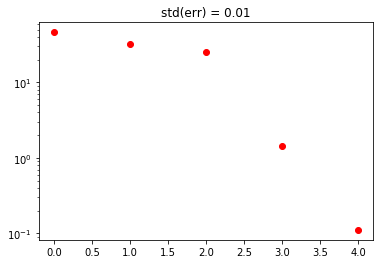

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.33971592  0.54285571  0.59373662 -1.0924207   0.40731843]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.39914671e+00  3.08095418e+00  5.99322046e+00
  2.81284347e+00 -4.05016474e+00]


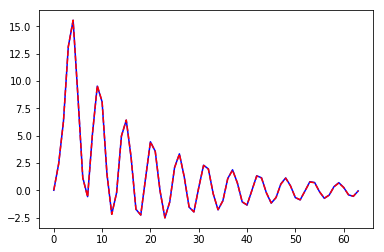

### na_est =  6 :


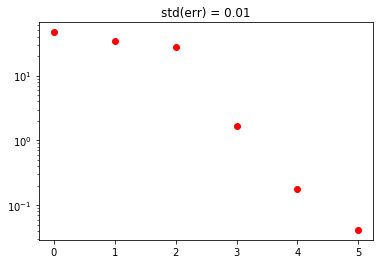

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.89480744  0.16293923  0.65785071 -0.78951922  0.04548692
  0.0331047 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40012301e+00  4.14882917e+00  7.88274754e+00
  6.41440440e+00 -9.85828406e-01 -1.76820662e-01]


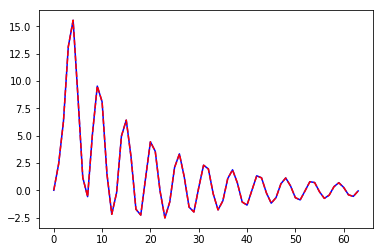

### na_est =  7 :


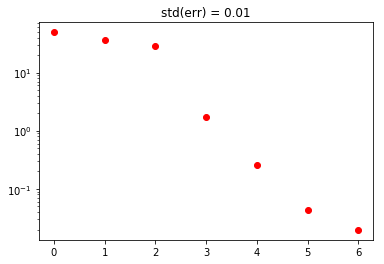

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.46541859 -0.18776321  0.69298878 -0.4972244  -0.27160656
  0.02158906  0.02108562]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40106525e+00  5.17948880e+00  9.74464507e+00
  9.92662600e+00  2.01268582e+00 -4.21448130e-01 -1.35672166e-01]


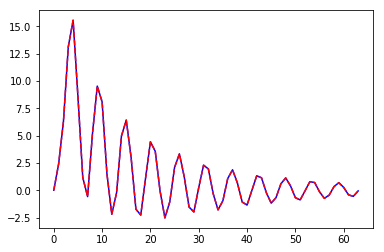

### na_est =  8 :


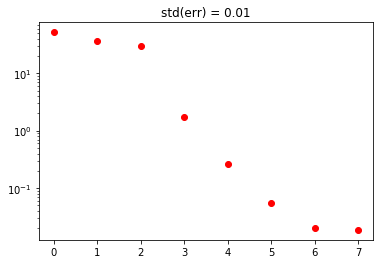

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.31095752  0.02918622  0.35915924 -0.24094498 -0.21551594
 -0.27066379  0.11322879 -0.03462859]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40140419e+00  5.55099371e+00  1.12378205e+01
  1.25189689e+01  5.77606630e+00  1.63974459e+00 -2.78746325e-01
  4.14860523e-01]


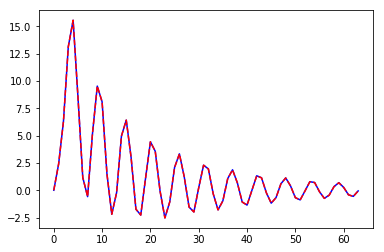

### na_est =  9 :


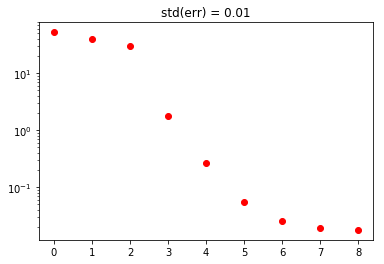

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.00000000e+00 -4.23852020e-01 -2.73838049e-02  2.13007280e-01
 -9.95761925e-02 -2.88473534e-01 -3.16907010e-01  3.13107886e-01
 -6.12807692e-02  9.96771654e-04]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40115646e+00  5.27968722e+00  1.03906181e+01
  1.03301647e+01  2.69653878e+00 -1.40839633e+00 -1.88170903e+00
  5.95708329e-01 -5.73925944e-02]


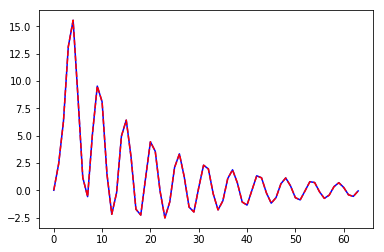

### na_est =  10 :


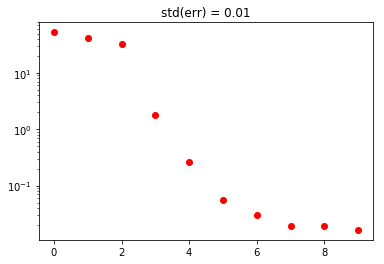

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.35194155 -0.09978874  0.13682656 -0.22689087 -0.1926759
 -0.31257667  0.17164621  0.10608423  0.06358592 -0.04806618]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40131426e+00  5.45226351e+00  1.06694113e+01
  1.06347415e+01  2.07933673e+00 -3.49157053e+00 -4.65933996e+00
 -1.21676906e+00  2.35584329e-01  4.42008692e-01]


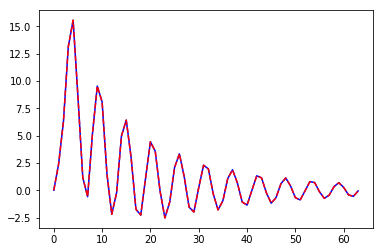

### na_est =  11 :


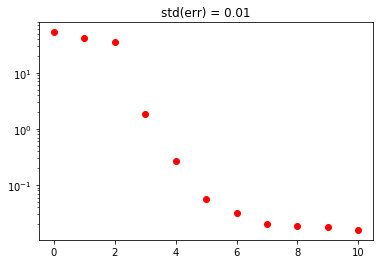

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.28229286 -0.06463238  0.02074927 -0.25542481 -0.31332564
 -0.22554234  0.08766613  0.05444388  0.23994904 -0.06243747 -0.00538378]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40146709e+00  5.61964284e+00  1.11922441e+01
  1.14914214e+01  2.82426941e+00 -4.34231782e+00 -7.00868564e+00
 -3.88960641e+00 -1.19293692e+00  6.39476095e-01  1.30458182e-02]


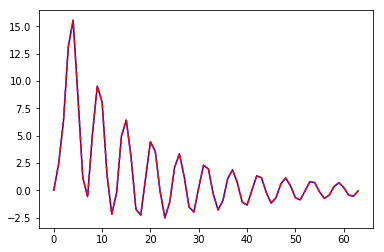

### na_est =  12 :


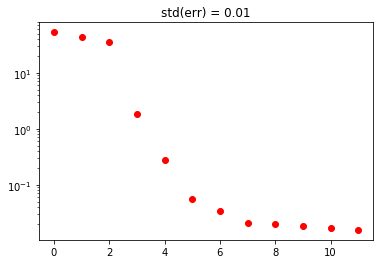

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.27476715 -0.03503224  0.01264237 -0.25071647 -0.32660209
 -0.24544351  0.08543572  0.05776353  0.2238157  -0.04978416  0.01710384
 -0.01401999]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40148361e+00  5.63778520e+00  1.13107244e+01
  1.17571535e+01  3.29006214e+00 -3.92627165e+00 -6.94264516e+00
 -4.16049931e+00 -1.61453697e+00  4.03401425e-01  6.37343025e-02
  1.36686016e-01]


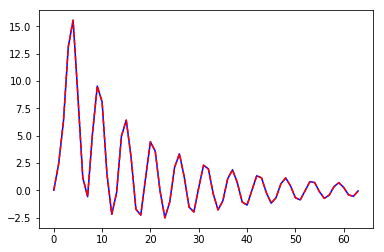

### na_est =  13 :


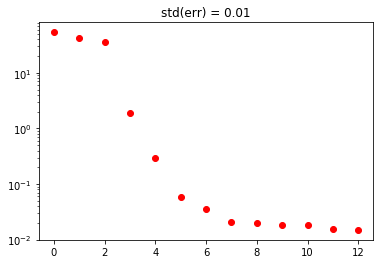

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.2694619  -0.03112241  0.02752615 -0.25369521 -0.33577636
 -0.25280626  0.06431039  0.06515903  0.21927604 -0.05765271  0.03647896
 -0.00864239 -0.00476149]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 2.19437185e-03  2.40149525e+00  5.65053744e+00  1.13535605e+01
  1.18871555e+01  3.51046030e+00 -3.66557201e+00 -6.78614606e+00
 -4.29566860e+00 -1.95229649e+00  2.73495049e-02 -1.30465217e-01
  1.71500435e-01  4.29505580e-02]


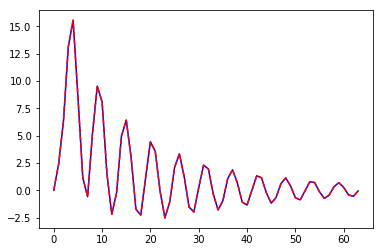

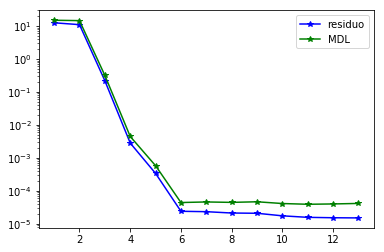

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.46541859 -0.18776321  0.69298878 -0.4972244  -0.27160656
  0.02158906  0.02108562]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [2.19437185e-03 2.40106525e+00 5.17948880e+00 9.74464507e+00
 9.92662600e+00]


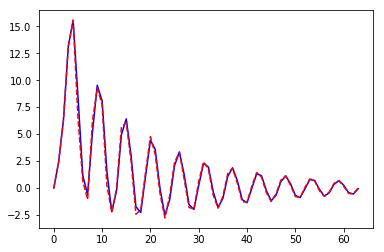

std = 1.0 :
### na_est =  1 :


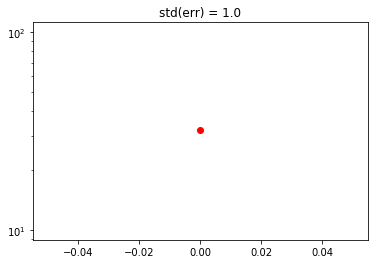

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.75534571]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.81394553 1.90932018]


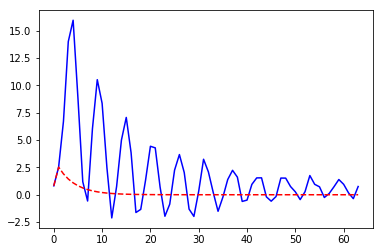

### na_est =  2 :


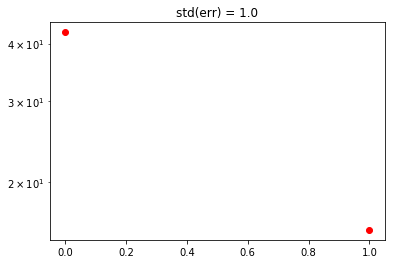

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.21035654  0.61408903]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.81394553 1.53896615 4.15040629]


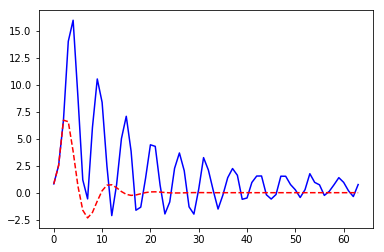

### na_est =  3 :


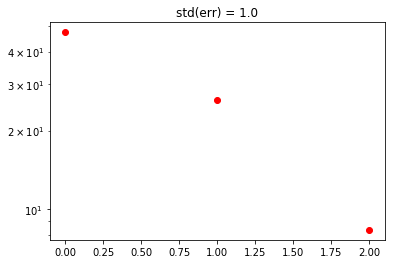

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -1.58897014  1.45634645 -0.71296155]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.81394553 1.2307953  3.88028782 6.43942015]


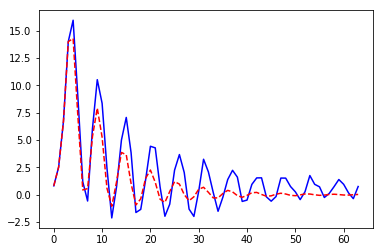

### na_est =  4 :


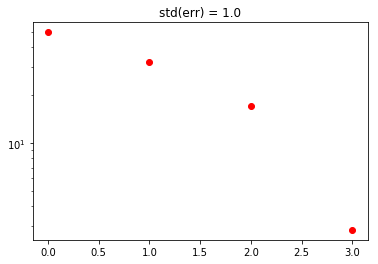

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.86749176  0.23679065  0.50361177 -0.65534517]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [0.81394553 1.8180394  4.70874136 9.18932186 6.1308351 ]


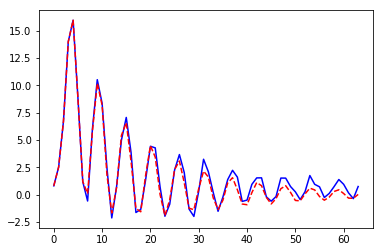

### na_est =  5 :


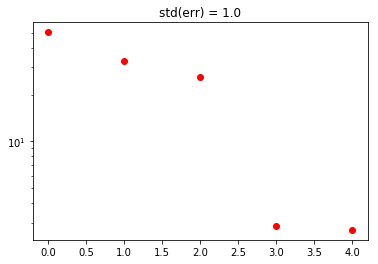

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.28309368 -0.05791794  0.26431658  0.02519042 -0.59566197]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.81394553  2.29370761  5.94396163 12.16944585 12.28541381  4.85011075]


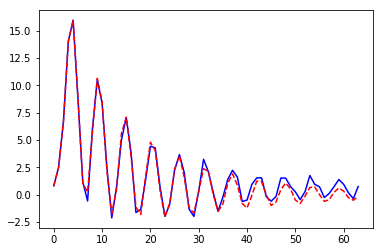

### na_est =  6 :


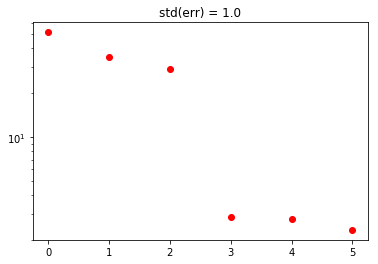

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.09080555 -0.00923129  0.20124513  0.03847297 -0.47762731
 -0.21453784]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.81394553  2.45021968  6.46895024 13.53042117 15.15531027  8.30515405
  1.93068867]


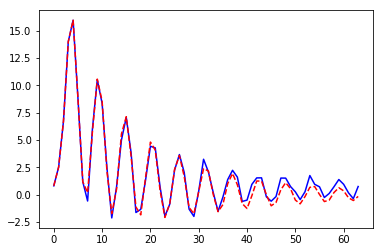

### na_est =  7 :


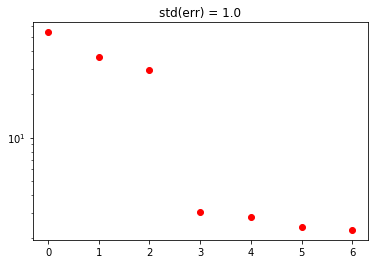

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.12707461 -0.05407903  0.15725733  0.06630015 -0.5035353
 -0.21538402  0.06018603]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.81394553  2.42069864  6.34089878 13.13820763 14.25847056  6.8530633
  0.40007789 -1.63503088]


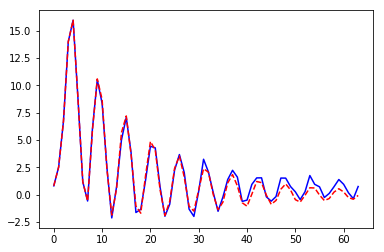

### na_est =  8 :


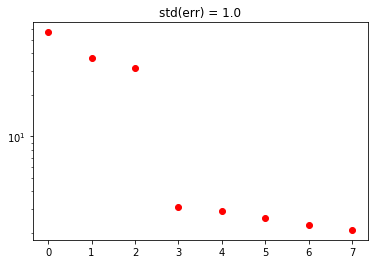

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.12644245 -0.14388291 -0.09242425  0.0161395  -0.44607667
 -0.22706117 -0.06077978  0.30765908]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.81394553  2.42121318  6.26939896 12.71254274 12.99406797  3.8518703
 -4.72271719 -6.85380771 -2.29303373]


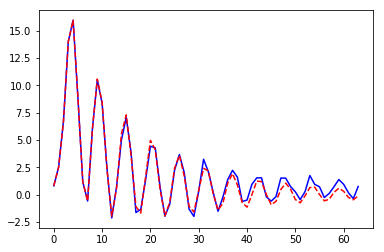

### na_est =  9 :


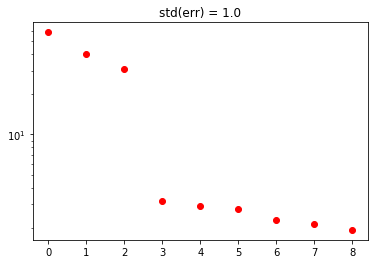

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.00551498 -0.13544986 -0.17556134 -0.16199408 -0.48032202
 -0.23825382 -0.11159162  0.21805649  0.2438453 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [  0.81394553   2.51964155   6.58149972  13.47705942  14.38862065
   4.86361146  -5.97493172 -10.75504544  -6.68263291  -2.07061144]


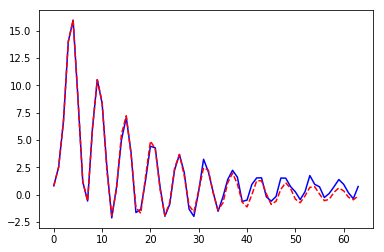

### na_est =  10 :


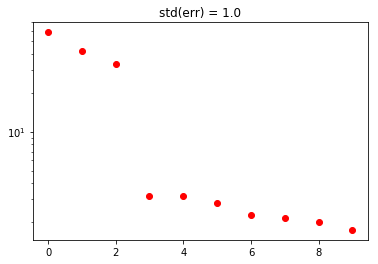

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.          0.00749838 -0.12512877 -0.15641974 -0.18009981 -0.50508639
 -0.25100639 -0.11027748  0.19779301  0.23558089  0.0337086 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [  0.81394553   2.53023372   6.62274794  13.60595469  14.6735811
   5.2781452   -5.62181846 -10.79390093  -7.24306951  -2.75766723
  -0.49574933]


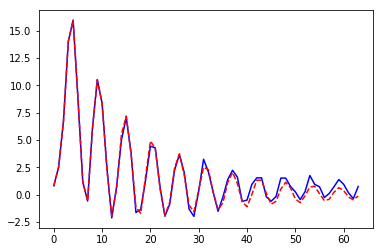

### na_est =  11 :


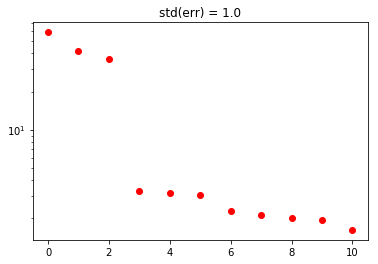

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.          0.01095174 -0.07513939 -0.06066779 -0.22790143 -0.55798762
 -0.38154802 -0.15117134  0.15939673  0.2272192  -0.01710232  0.17778893]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [  0.81394553   2.53304456   6.67215329  13.83322833  15.25991876
   6.51138064  -4.01396746 -10.20820109  -8.85364159  -6.12298542
  -3.7105028   -1.05571719]


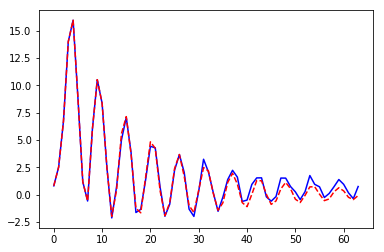

### na_est =  12 :


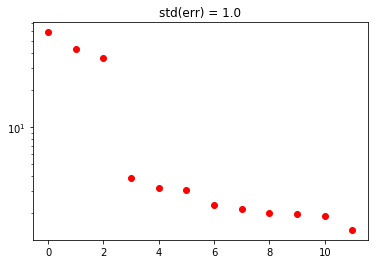

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.          0.00148729 -0.07025537 -0.0569903  -0.23372716 -0.53258549
 -0.38374062 -0.1505535   0.15532675  0.23222945 -0.0343709   0.17999053
 -0.00121293]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [  0.81394553   2.52534102   6.65223912  13.78508407  15.16471885
   6.4594329   -3.94484496 -10.03390318  -8.56375861  -5.85754364
  -3.62043993  -1.10253421  -0.23825504]


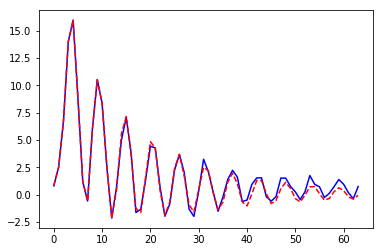

### na_est =  13 :


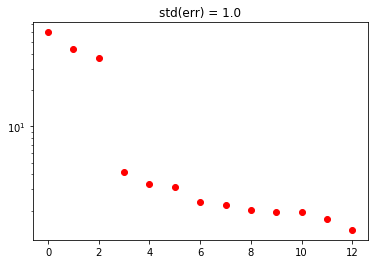

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.01126187 -0.02709389 -0.05671484 -0.21405468 -0.47576296
 -0.43866197 -0.18991902  0.07234004  0.20751764 -0.058256    0.20495863
 -0.0347294   0.10308232]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.81394553  2.5149639   6.65518968 13.80876186 15.2923798   6.95805919
 -3.13446928 -9.1779616  -7.92890263 -6.14135631 -5.03485408 -3.17735538
 -2.02609066 -0.35823432]


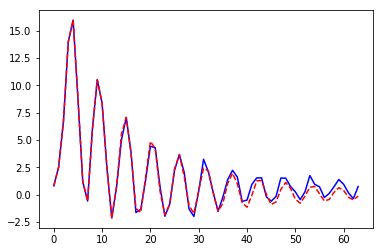

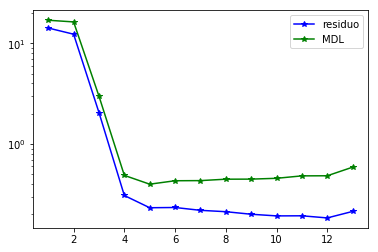

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.12707461 -0.05407903  0.15725733  0.06630015 -0.5035353
 -0.21538402  0.06018603]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 0.81394553  2.42069864  6.34089878 13.13820763 14.25847056]


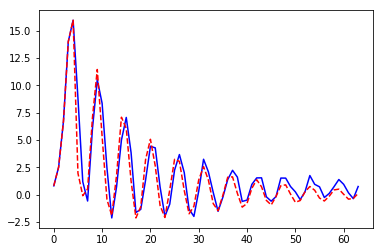

std = 10.0 :
### na_est =  1 :


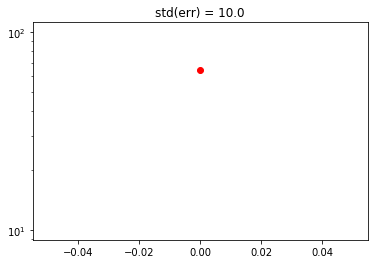

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.81518781]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [6.74700972 1.80539099]


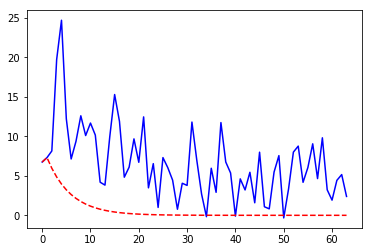

### na_est =  2 :


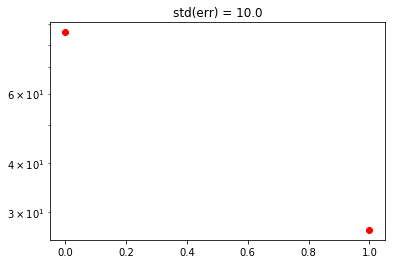

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.66183742 -0.18154357]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [6.74700972 2.84004751 2.08978187]


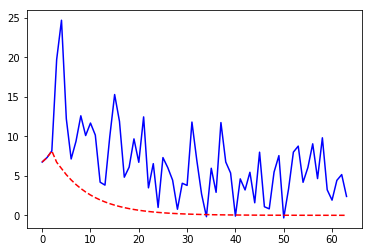

### na_est =  3 :


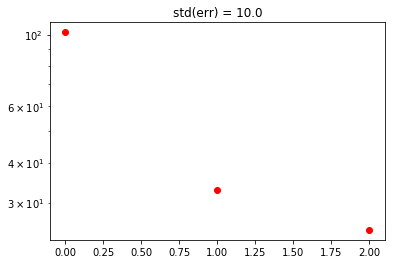

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.60973986 -0.06431445 -0.16530032]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  3.19155031  3.26132515 13.1717737 ]


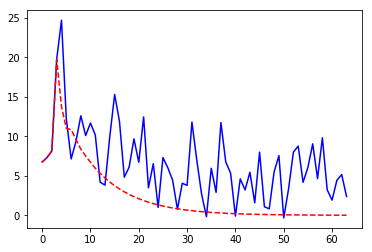

### na_est =  4 :


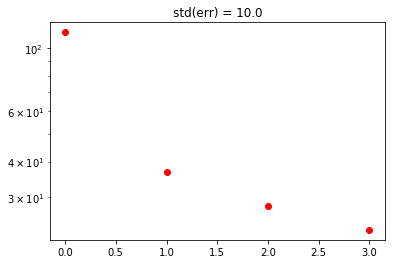

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.38881147 -0.09945676  0.12051258 -0.47458474]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  4.68215625  4.63820554 16.6439233  13.89803026]


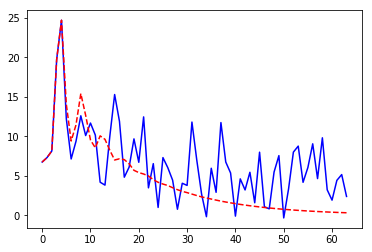

### na_est =  5 :


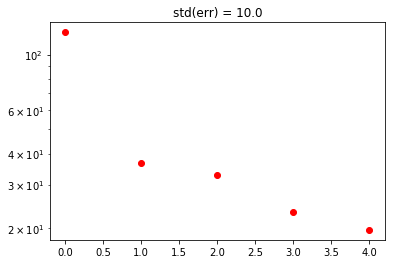

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.33629996 -0.12366363  0.13230628 -0.40260091 -0.12226964]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.03645192  4.85850288 16.9746056  15.308433   -1.21533553]


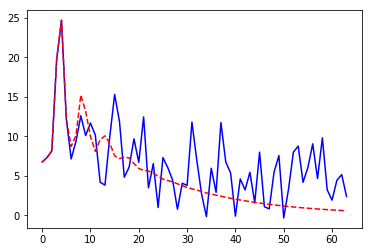

### na_est =  6 :


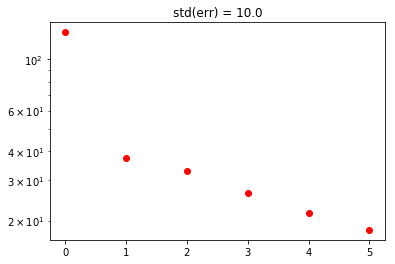

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.257191    0.07663977  0.06390336 -0.38189948  0.06218897
 -0.41013941]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.57020086  6.78788012 18.62111486 18.14131229  5.52816959
  1.72114349]


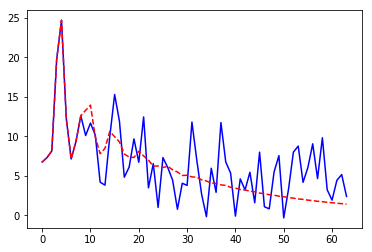

### na_est =  7 :


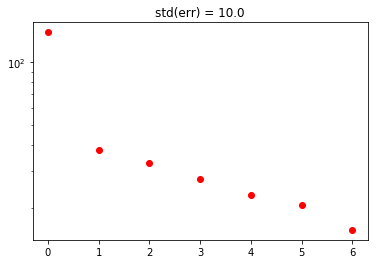

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.22656669  0.07660858  0.0919442  -0.38659817  0.05078902
 -0.38750147 -0.0582819 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.7768234   7.01139471 19.05965752 18.91830566  6.40125524
  2.67885725  0.52152159]


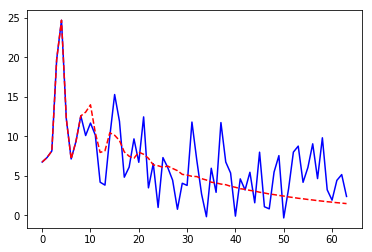

### na_est =  8 :


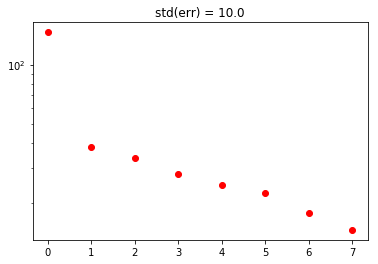

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.23433815  0.03156801  0.09348843 -0.43052922  0.05945745
 -0.36671512 -0.09130616  0.08825051]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.72438928  6.6507314  18.67769889 18.11281644  5.0709601
  1.34741214 -0.91302207 -0.74716677]


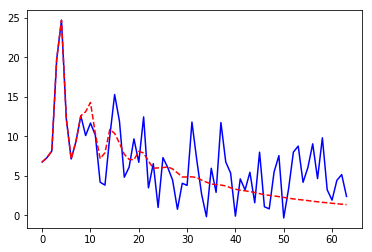

### na_est =  9 :


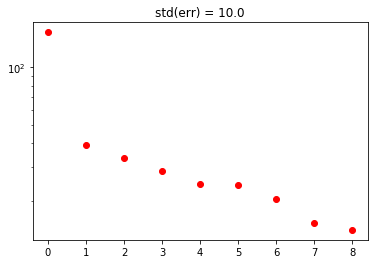

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.21338886  0.00942542  0.00625794 -0.41518008 -0.09550996
 -0.36418581 -0.0297119   0.01864385  0.19460917]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.86573437  6.65437956 18.09812216 17.81190985  3.50728372
 -1.65420952 -3.71478227 -4.45157932 -5.86370301]


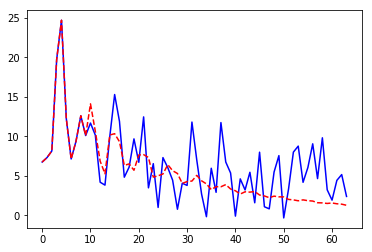

### na_est =  10 :


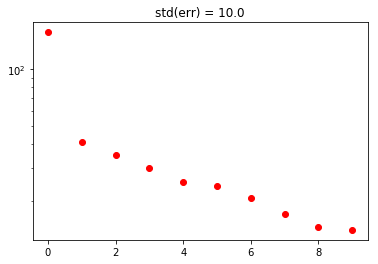

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.23909477 -0.00604434  0.02805389 -0.31632875 -0.08175191
 -0.29828597 -0.05600787  0.00477658  0.26725718 -0.19034961]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.69229633  6.36221115 17.92267051 18.00493933  3.559803
 -0.56970734 -1.18277717 -1.57203312 -3.15489949 -1.56860248]


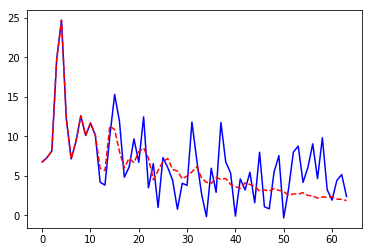

### na_est =  11 :


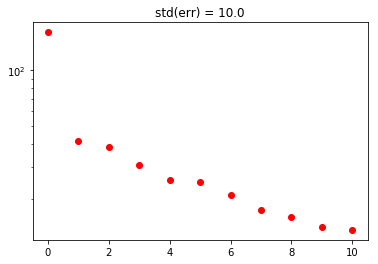

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.19179107 -0.05158034  0.01276144 -0.28889473 -0.01882879
 -0.30431655  0.03029656 -0.01130883  0.24047241 -0.11507527 -0.17398293]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  6.01145486  6.40055512 17.87234086 18.64033136  4.33028617
 -0.77554821 -0.18714429  0.750976   -0.91888896  0.8913244   1.46900563]


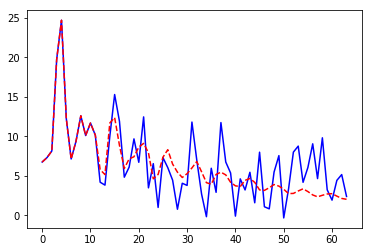

### na_est =  12 :


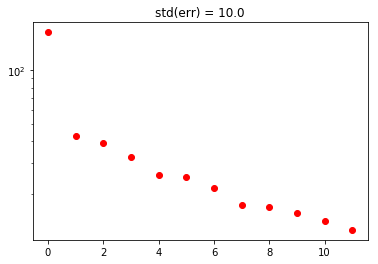

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.18014703 -0.02616905  0.01107347 -0.29599838 -0.01294567
 -0.28208039  0.02192276 -0.01701321  0.21979256 -0.11010135 -0.1461614
 -0.05523089]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  6.09001731  6.65707057 18.14148895 19.01685729  5.09320045
  0.09619928  0.17850211  1.04289101 -0.29845525  1.55460084  1.82372535
 -1.84937003]


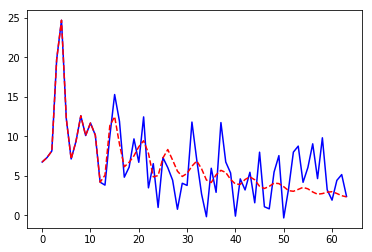

### na_est =  13 :


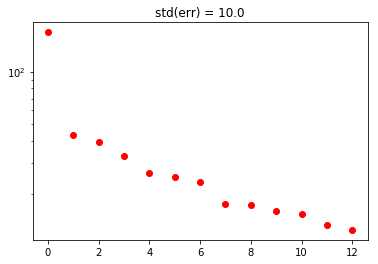

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.17013254 -0.01447763  0.03768176 -0.30697369 -0.0263672
 -0.27081271  0.04413804 -0.02300475  0.23124749 -0.12890237 -0.14355397
 -0.02448987 -0.07296189]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  6.15758515  6.80911319 18.48804161 19.43002101  5.6172979
  0.9207436   0.95635488  1.22308937  0.09833963  2.43457398  2.73733952
 -1.10328364 -1.20425846]


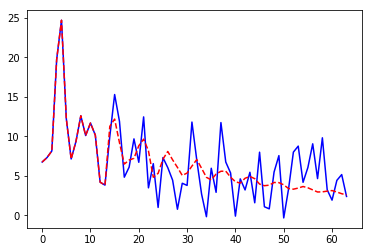

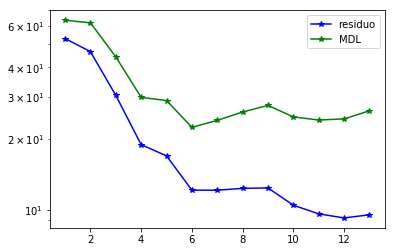

a =  [ 1.         -0.79        0.1057      0.647529   -0.71747008 -0.01321738
  0.01181941  0.00287246]
a_est =  [ 1.         -0.22656669  0.07660858  0.0919442  -0.38659817  0.05078902
 -0.38750147 -0.0582819 ]
b =  [0.  2.4 4.4 8.4 7.4]
b_est =  [ 6.74700972  5.7768234   7.01139471 19.05965752 18.91830566]


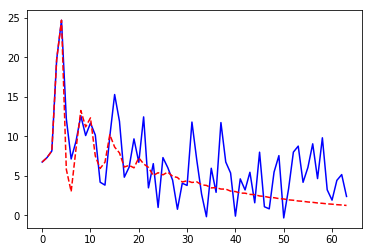

In [8]:
a = np.poly([0.2, 0.4+0.87j, 0.4-0.87j, -0.1+0.1j, -0.1-0.1j, -0.89, 0.88])
na = len(a) - 1
print("na = ", na)
b = np.array([0.0, 2.4, 4.4, 8.4, 7.4])
nb = len(b) - 1
N = 64
vstderr = np.array([0., 1e-16, 1e-12, 1e-6, 1e-4, 1e-2, 1e0, 1e1])
jfig = 0
for stde in vstderr:
  print('std = ' + str(stde) + ' :')    
  u=np.zeros(N);  u[0]=1.
  y = simula_DLTI(b,a,u) + stde*np.random.rand(N) ;
  if stde >= 0.:
    vna = range(1,na+7)
    n2res = np.zeros(len(vna))
    MDL = np.zeros(len(vna))
    for na_est in vna:
      print('### na_est = ',na_est,':')
      A = hankel(y[1:N-na_est], y[N-na_est-1:N-1])
      U,S,V = np.linalg.svd(A.copy())
      V = V.T
      plt.figure(jfig*20+na_est); plt.semilogy(S,'ro'); plt.title('std(err) = ' + str(stde)); plt.show() 
      # ora stimo i coefficienti "a" e "b" a partire da "h(n)" (NB: n = k+1 !) :
      d = - np.atleast_2d( y[na_est+1:N] ).T
      Q,R = np.linalg.qr(A.copy())
      B = hankel(np.concatenate((np.zeros(na_est), np.array([y[0]]))), y[0:na_est+1])
      # risolvo il sistema (10.2.10) :
      a_est = np.ones((na_est+1,1))
      a_est[0:na_est] = np.linalg.solve( R , Q.T@d )
      b_est = B @ a_est
      b_est = np.squeeze(b_est[0:na_est+1])
      a_est = np.squeeze(a_est[range(na_est,-1,-1)])
      print('a = ', a)
      print('a_est = ', a_est)
      print('b = ', b)
      print('b_est = ', b_est)  
      y_est = simula_DLTI(b_est, a_est, u);  
      n2res[na_est-1] = 1./(N-na_est)*np.sum((y - y_est)**2)
      MDL[na_est-1] = n2res[na_est-1]*(1 + (na_est+na_est+1)*np.log(N)/N)
      plt.figure(jfig*20+19); plt.plot(range(N),y,'b-'); plt.plot(range(N),y_est,'r--'); plt.show() 
    #endfor
    plt.figure(); plt.semilogy(vna,n2res,'b*-',label='residuo'); plt.semilogy(vna,MDL,'g*-',label='MDL'); 
    #if stde < 10.: plt.ylim([0.0,2.0]); 
    plt.legend(); plt.show()
  #endif
  # ora stimo i coefficienti "a" e "b" a partire da "h(n)" (NB: n = k+1 !) :
  A = hankel(y[1:N-na], y[N-na-1:N-1])
  d = - np.atleast_2d( y[na+1:N] ).T
  Q,R = np.linalg.qr(A.copy())
  B = hankel(np.concatenate((np.zeros(na), np.array([y[0]]))), y[0:na+1])
  # risolvo il sistema (10.2.10) :
  a_est = np.ones((na+1,1))
  a_est[0:na] = np.linalg.solve( R , Q.T@d )
  b_est = B @ a_est
  b_est = np.squeeze(b_est[0:nb+1])
  a_est = np.squeeze(a_est[range(na,-1,-1)])
  print('a = ', a)
  print('a_est = ', a_est)
  print('b = ', b)
  print('b_est = ', b_est)  
  y_est = simula_DLTI(b_est, a_est, u);  
  plt.figure(jfig*20+19); plt.plot(range(N),y,'b-'); plt.plot(range(N),y_est,'r--'); plt.show() 
  jfig += 1
#endfor

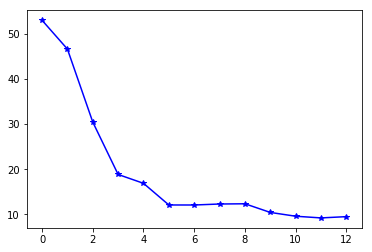

In [9]:
plt.figure()
plt.plot(n2res,'b*-')
plt.show()